In [ ]:
!pip install sweetviz
!pip install  pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.8 MB/s eta 0:00:00


In [ ]:
# importing packages for data cleaning, visualization, and EDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import statsmodels
import sklearn.model_selection as train_test_split
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#supressing warnings for more clear outputs
warnings.filterwarnings("ignore")


#task-1 : data prepration
#reading the data
df = pd.read_csv("telco-customer-churn.csv")

#data overview
print("Initial Data Oveerview:")
print(df.info())
print("\nInitial Data Description:")
print(df.describe())

Initial Data Oveerview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [ ]:
df.shape

(7032, 20)

In [ ]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0            0.0        1           0     1.0             0   
1       1            0.0        0           0    34.0             1   
2       1            0.0        0           0     2.0             1   
3       1            0.0        0           0    45.0             0   
4       0            0.0        0           0     2.0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0            NaN              NaN             0.0           1.0   
1            0.0              NaN             1.0           0.0   
2            0.0              NaN             1.0           1.0   
3            NaN              NaN             1.0           0.0   
4            0.0              NaN             0.0           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0         6   
1               1.0          0.0          0.0              0.0         7   
2               0.0          0.0          0.0              0.0         6   
3               1.0          1.0          0.0              0.0         7   
4               0.0          0.0          0.0              0.0         6   

   PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges Churn  
0                 1              9           29.85        29.85    No  
1                 0             10           56.95       1889.5    No  
2                 1             10           53.85       108.15   Yes  
3                 0             11           42.30      1840.75    No  
4                 1              9           70.70       151.65   Yes

In [ ]:
df.tail()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
7038       1            0.0        1           1    24.0             1   
7039       0            0.0        1           1    72.0             1   
7040       0            0.0        1           1    11.0             0   
7041       1            1.0        1           0     4.0             1   
7042       1            0.0        0           0    66.0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
7038            1.0              NaN             1.0           0.0   
7039            1.0              NaN             0.0           1.0   
7040            NaN              NaN             1.0           0.0   
7041            1.0              NaN             0.0           0.0   
7042            0.0              NaN             1.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
7038               1.0          1.0          1.0              1.0         7   
7039               1.0          0.0          1.0              1.0         7   
7040               0.0          0.0          0.0              0.0         6   
7041               0.0          0.0          0.0              0.0         6   
7042               1.0          1.0          1.0              1.0         8   

      PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges Churn  
7038                 1             10           84.80       1990.5    No  
7039                 1             12          103.20       7362.9    No  
7040                 1              9           29.60       346.45    No  
7041                 1             10           74.40        306.6   Yes  
7042                 1             11          105.65       6844.5    No

In [ ]:
#checking for missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        1
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
# Replacing blank spaces with NaN and handling missing values

df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
print("\nMissing values handled by dropping rows.")


Missing values handled by dropping rows.


In [ ]:
#after dropping rows , we're checking for missing values

mappings = {
    "yes": 1, "no": 0,
     "Female": 0, "Male": 1,
    "No phone service": 2, "No internet service": 3,
    "DSL": 4, "Fiber optic": 5,
    "Month-to-month": 6, "One year": 7, "Two year": 8,
    "Electronic check": 9, "Mailed check": 10,
    "Bank transfer (automatic)": 11, "Credit card (automatic)": 12,
    " ": -1  #this is for missing values
}

#applying mappingtooo each column

for col in df.columns:
    df[col] = df[col].map(mappings).fillna(df[col])

In [ ]:
# dropping column

df = df.drop(columns=['customerID'])


In [ ]:
# Outlier Detection using Z-score

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keeping rows with z-score less than 3
print("\nOutliers detected and removed using Z-score.")



Outliers detected and removed using Z-score.


In [ ]:
#checking the transformed dataframe

print("\nTransformed Dataframe:")
print(df.head())


Transformed Dataframe:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       0            0.0     Yes         No     1.0           No   
1       1            0.0      No         No    34.0          Yes   
2       1            0.0      No         No     2.0          Yes   
3       1            0.0      No         No    45.0           No   
4       0            0.0      No         No     2.0          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           2.0             4.0             No          Yes               No   
1            No             4.0            Yes           No              Yes   
2            No             4.0            Yes          Yes               No   
3           2.0             4.0            Yes           No              Yes   
4            No             5.0             No           No               No   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
0          No 

In [ ]:
  # Task 2 : list all ytype of data, numerical, catrgorical, text.

print("\nData types:")
print(df.dtypes)


Data types:
gender                int64
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling     object
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

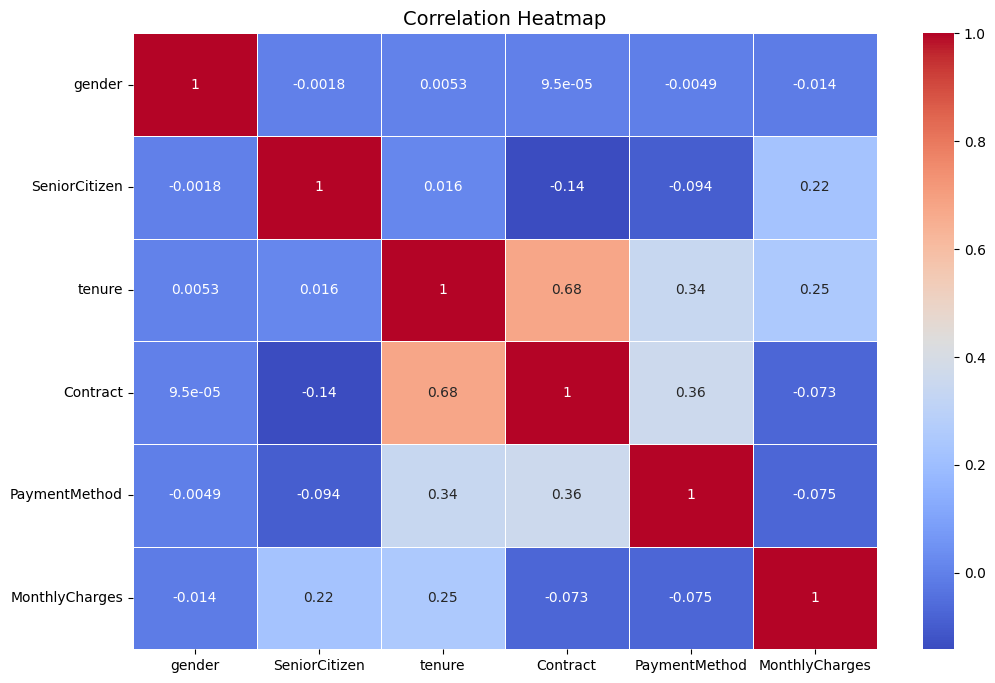

In [ ]:
#Task 3: perform EDA

#listing most important variable targeting the data

plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

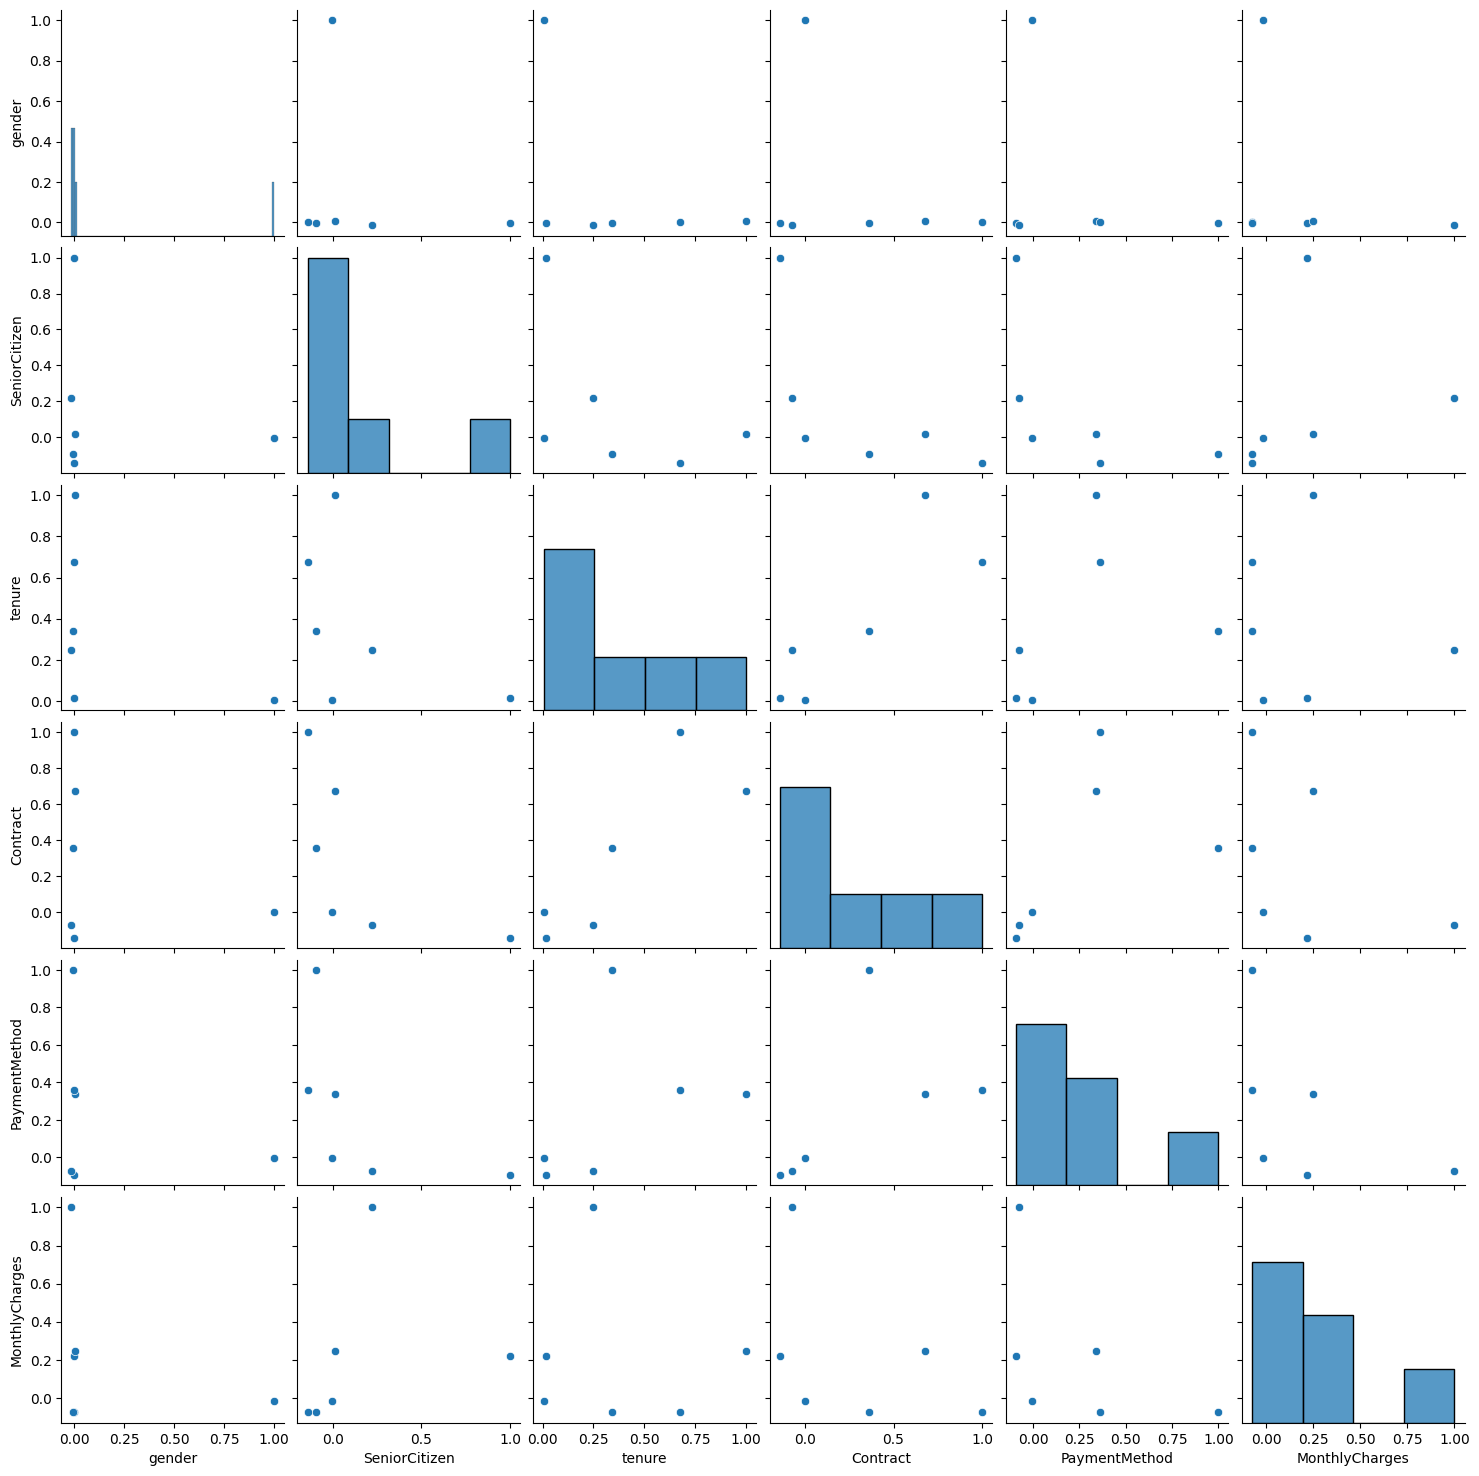

In [ ]:
sns.pairplot(corr)

<Axes: >

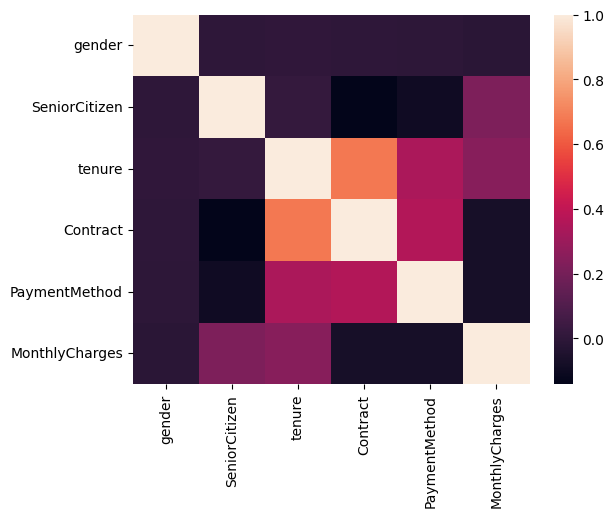

In [ ]:
sns.heatmap(corr)

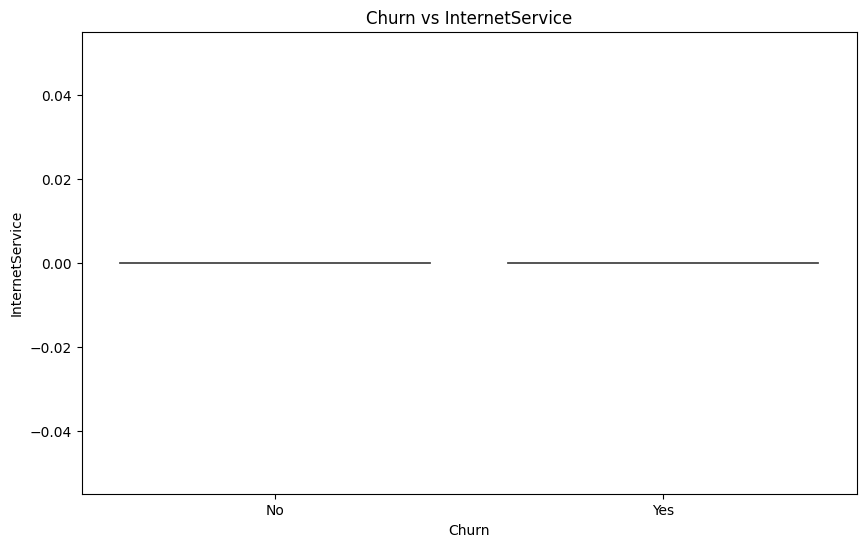

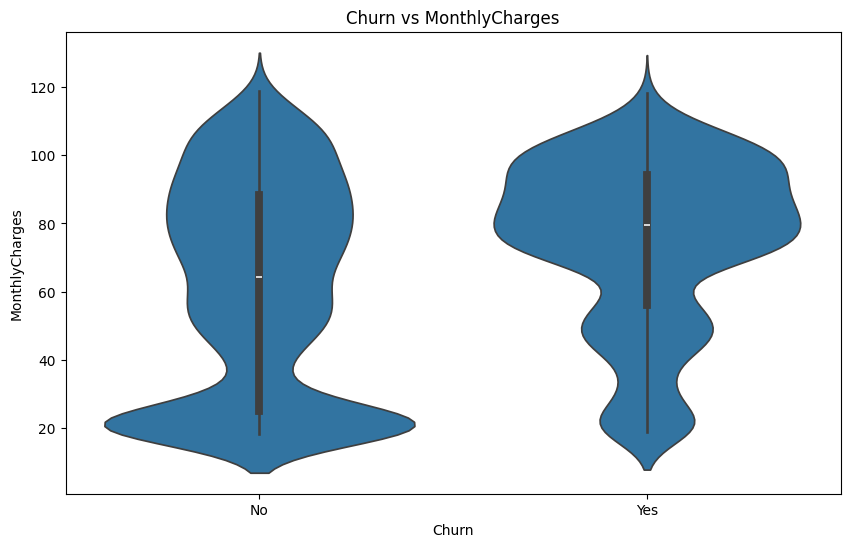

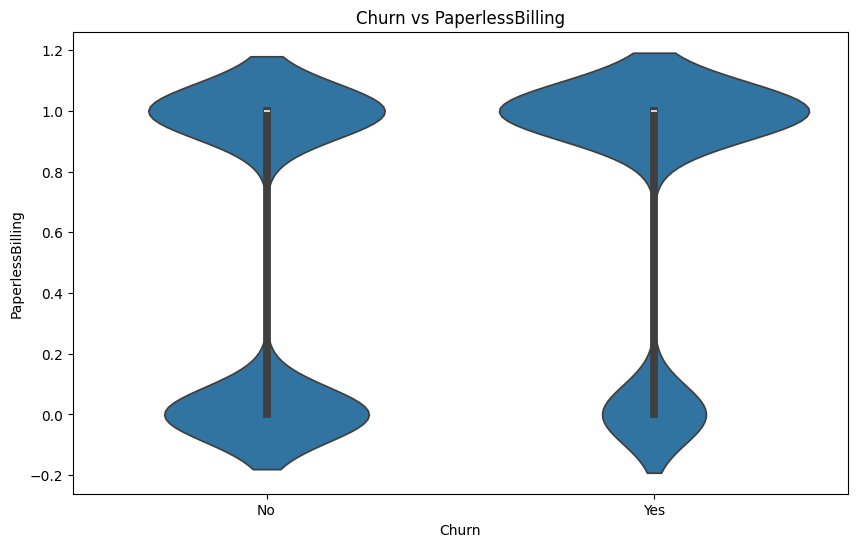

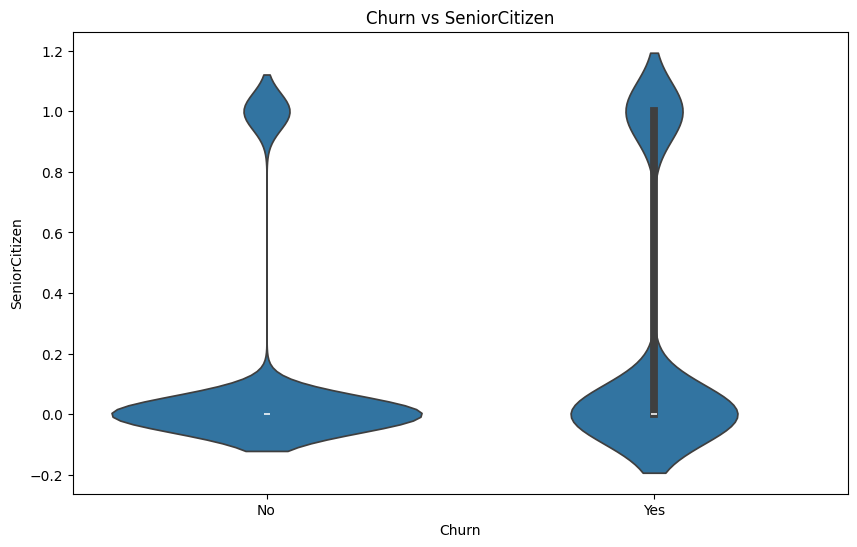

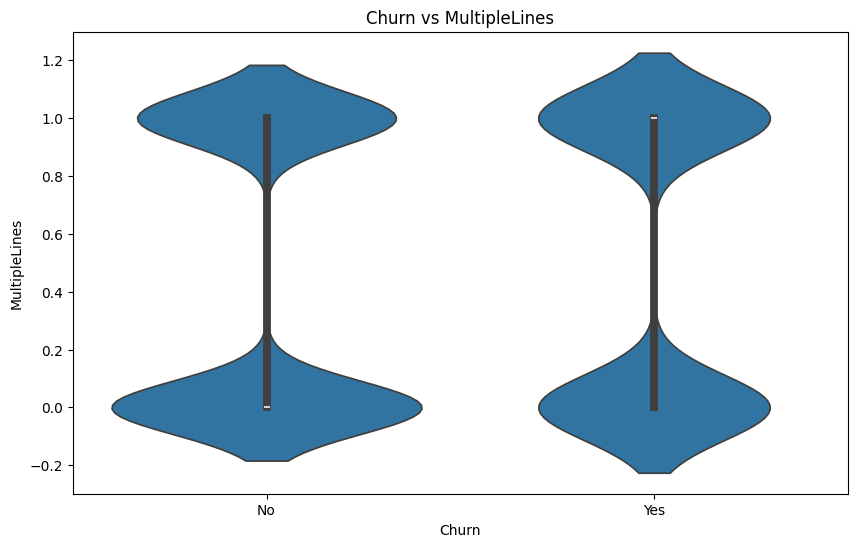

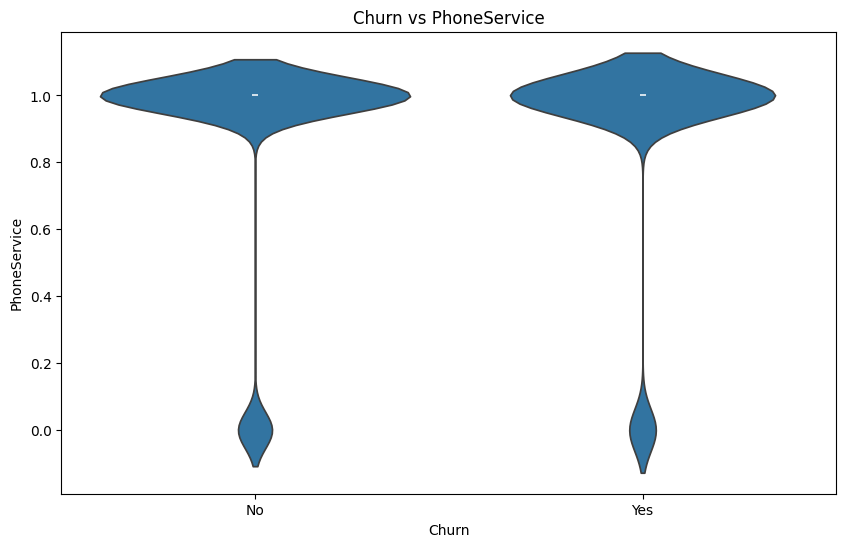

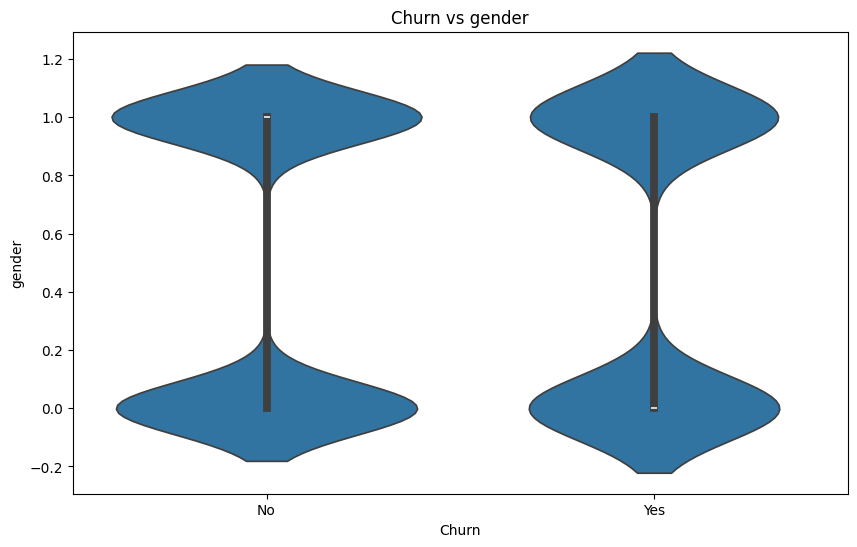

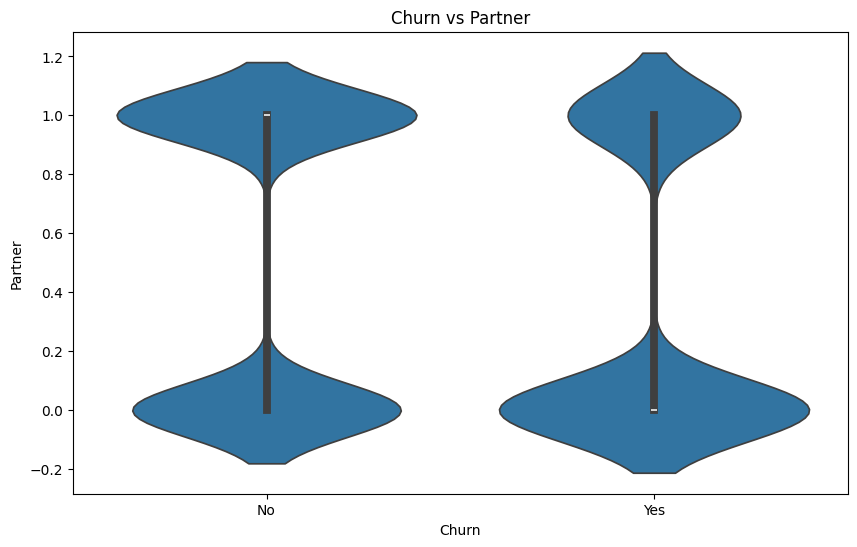

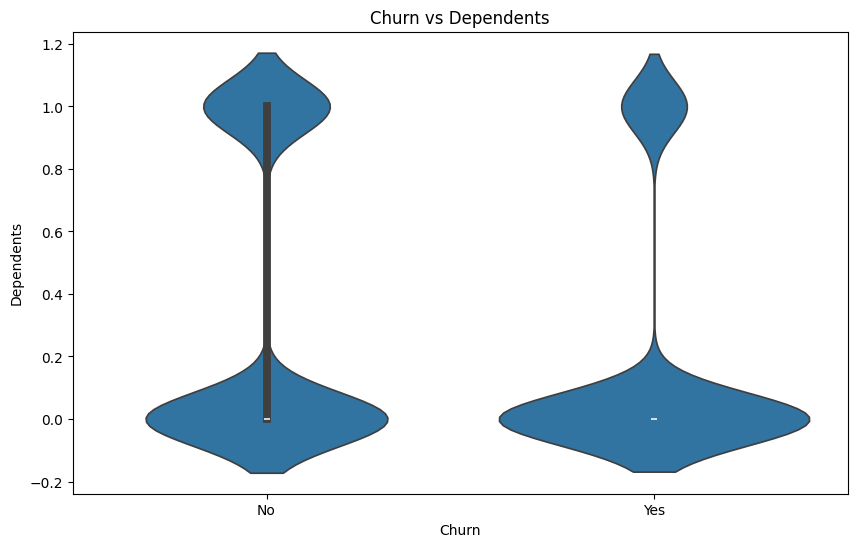

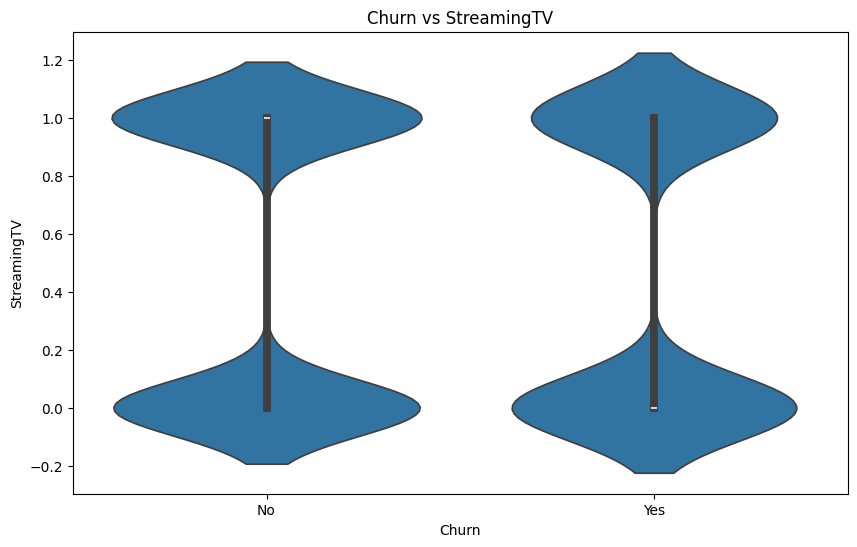

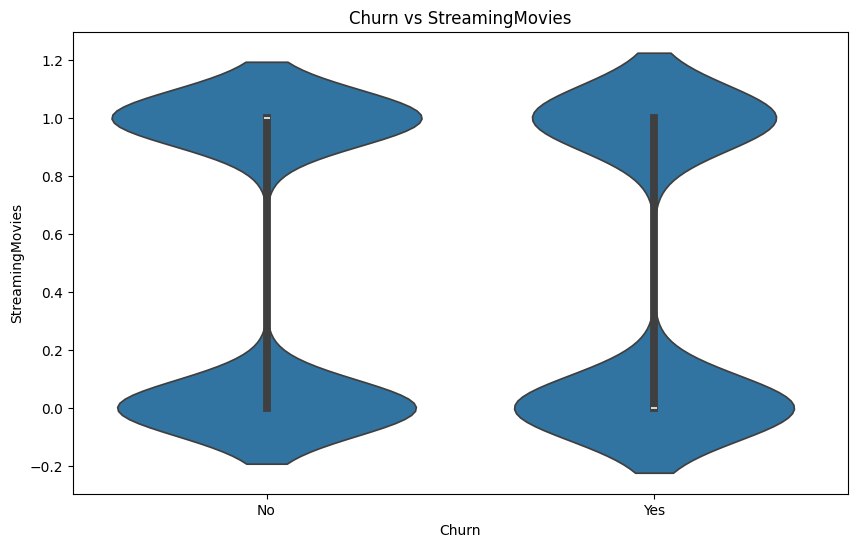

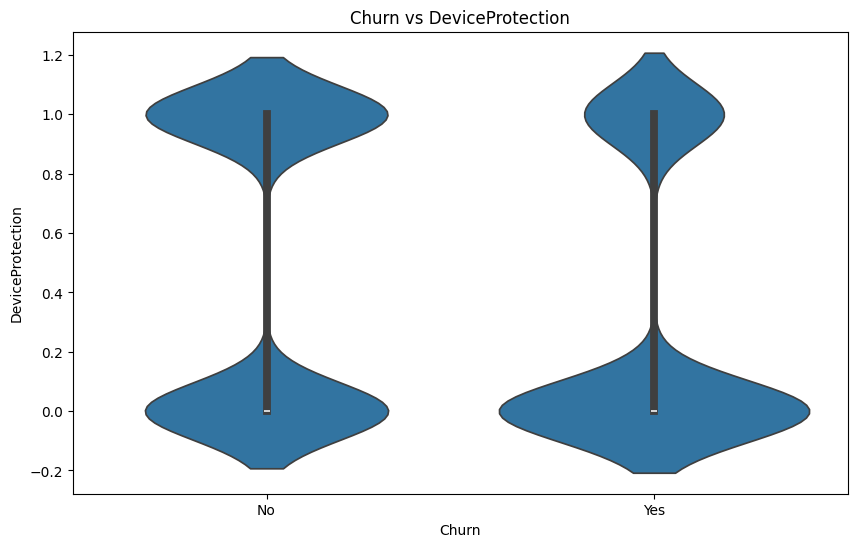

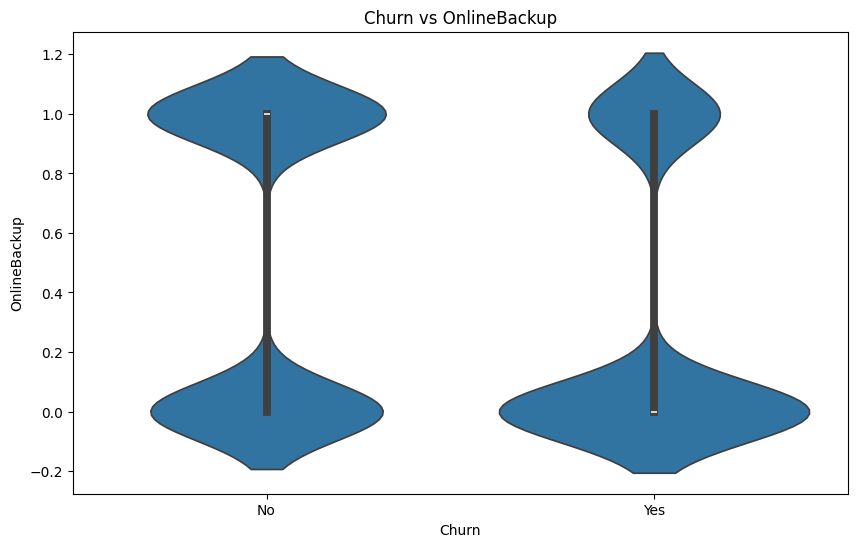

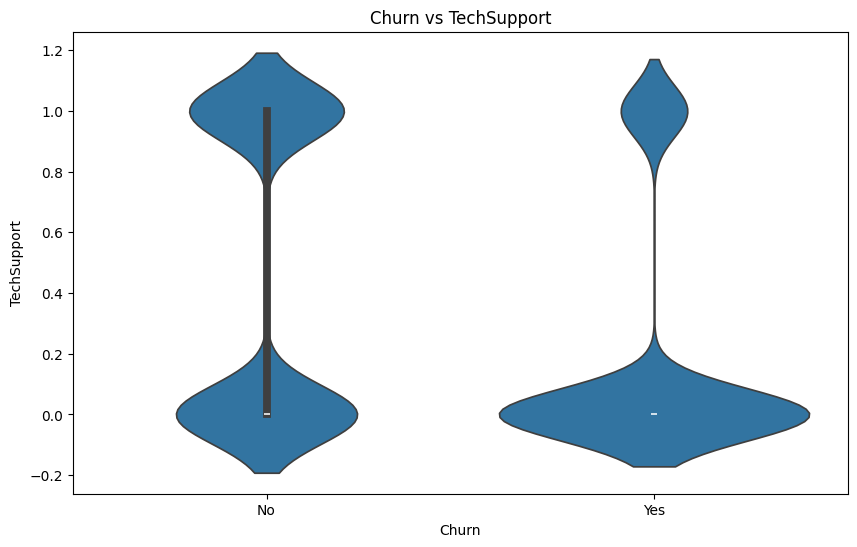

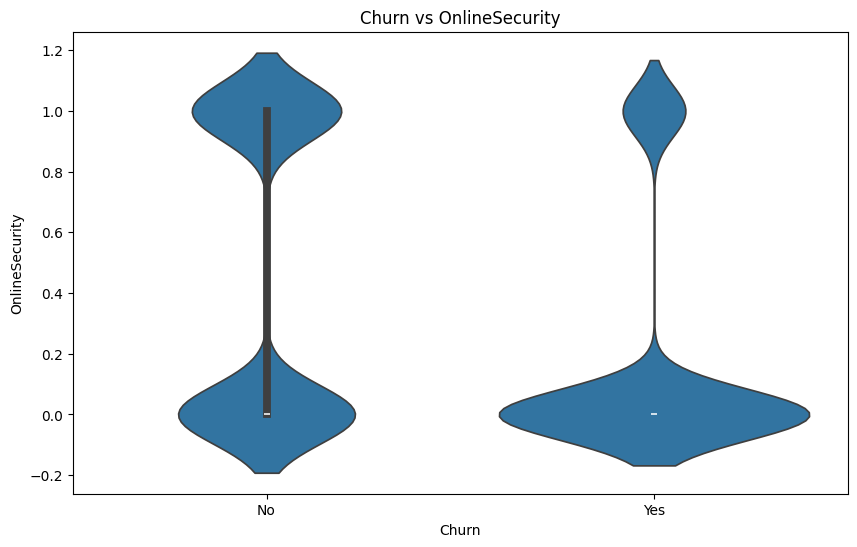

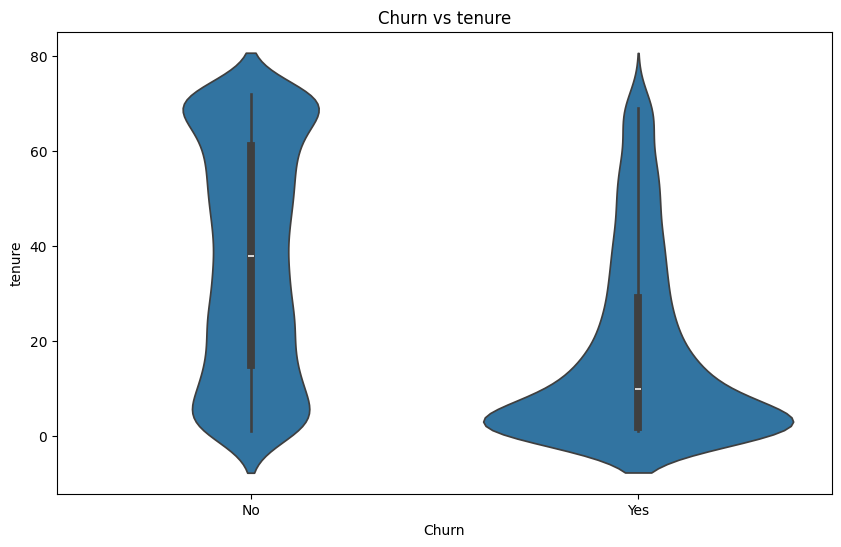

In [ ]:
# Additional visualizations for EDA using violin plots (individual plots)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_churn_vs_feature(df: pd.DataFrame, feature: str) -> None:
    """
    Plots a violin plot for Churn against a specified feature.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    feature (str): The feature to plot against Churn.
    """
    plt.figure(figsize=(10, 6))
    # Check if the feature is numeric or can be converted to numeric
    if df[feature].dtype == 'object':
        # Convert categorical features to numeric using mapping
        df[feature] = df[feature].map({'Yes': 1, 'No': 0})  # Example mapping for binary features
    sns.violinplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn vs {feature}')
    plt.show()

# List of features to plot against Churn
features = [
    'InternetService', 'MonthlyCharges', 'PaperlessBilling',
    'SeniorCitizen', 'MultipleLines', 'PhoneService',
    'gender', 'Partner', 'Dependents', 'StreamingTV',
    'StreamingMovies', 'DeviceProtection', 'OnlineBackup',
    'TechSupport', 'OnlineSecurity', 'tenure'
]

# Loop through each feature and create the plots
for feature in features:
    plot_churn_vs_feature(df, feature)

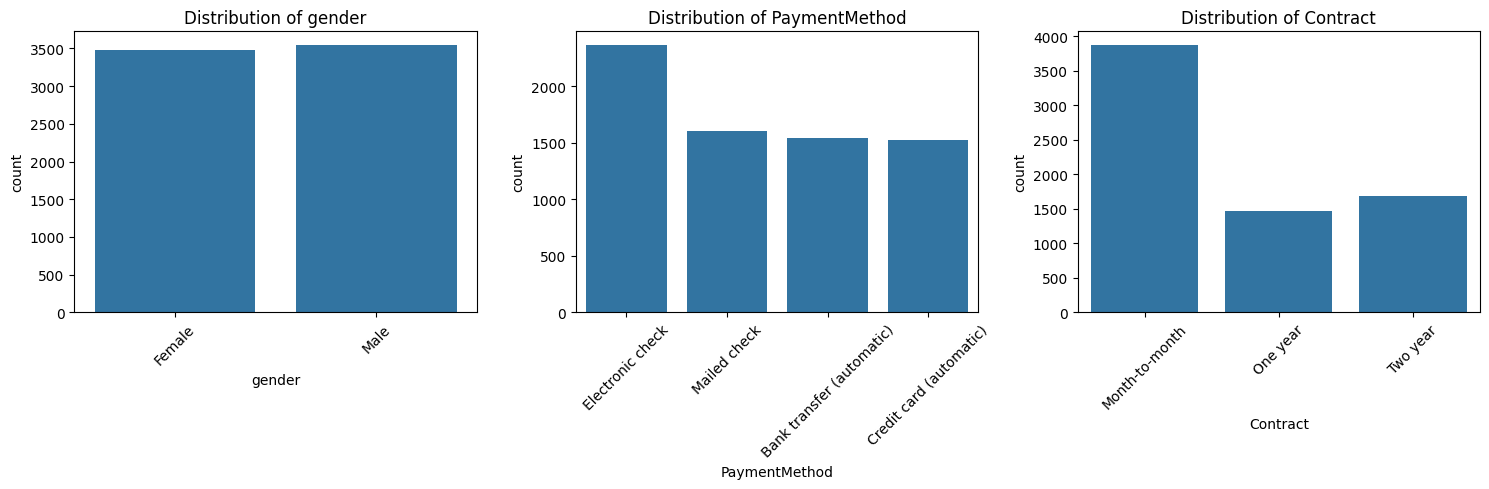

In [ ]:
inverse_mappings = {v: k for k, v in mappings.items()}
plt.figure(figsize=(15, 5))
for i, col in enumerate(['gender', 'PaymentMethod','Contract']):
    plt.subplot(1, 3, i + 1)
    ax = sns.countplot(data=df, x=col, order=sorted(df[col].unique()))  # sorted helps order labels
    labels = [inverse_mappings.get(val, val) for val in sorted(df[col].unique())]
    ax.set_xticklabels(labels, rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


UNIVARIATE ANALYSIS

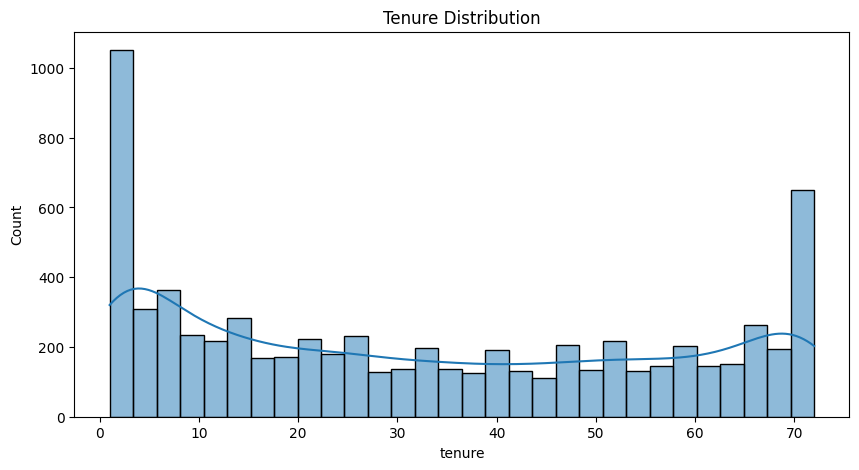

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()

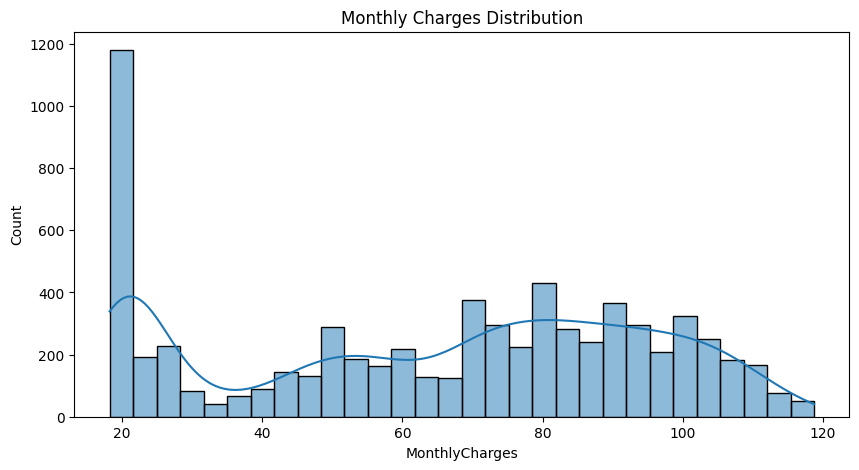

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

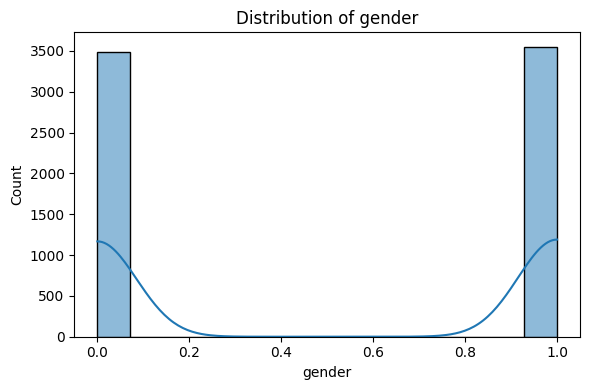

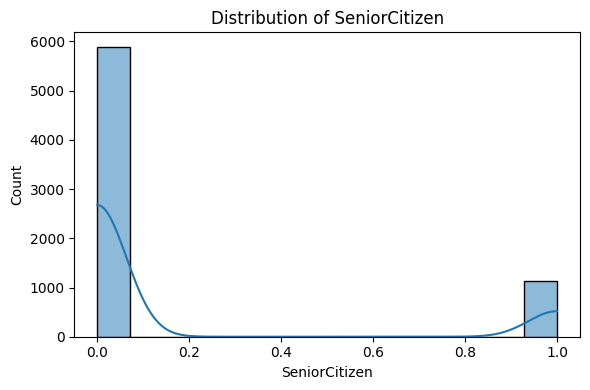

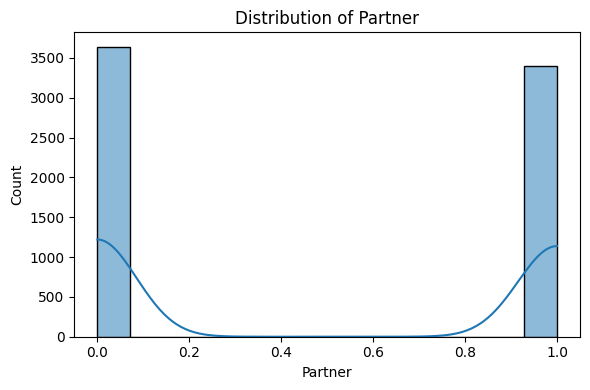

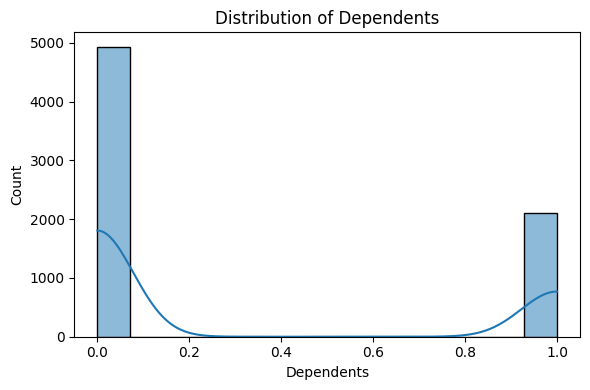

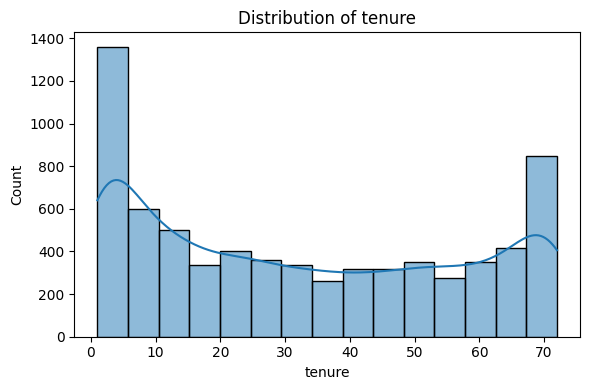

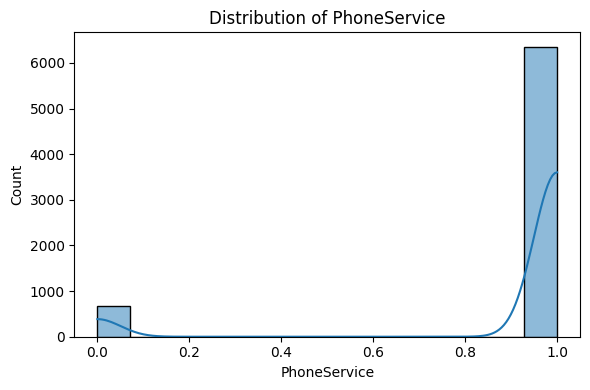

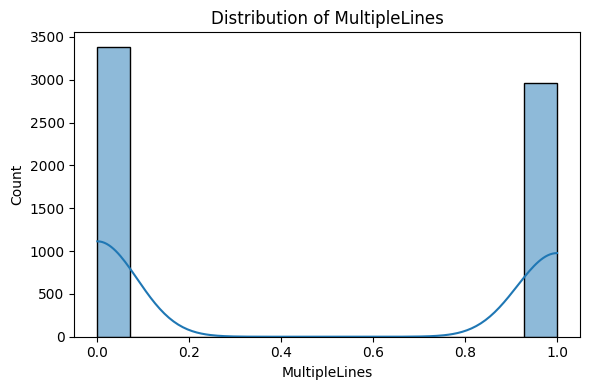

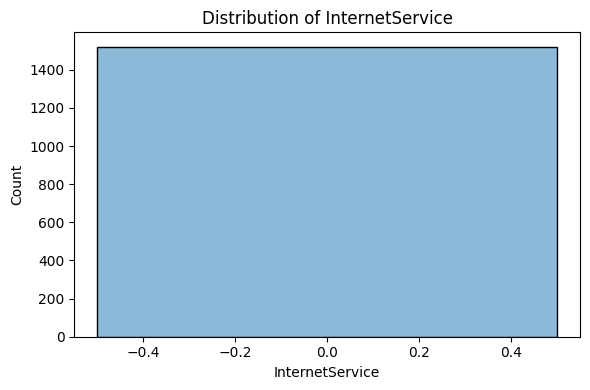

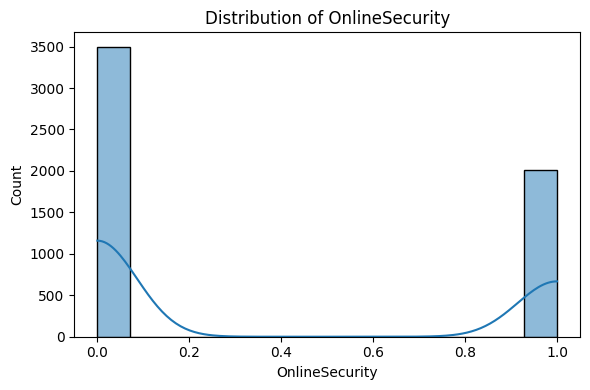

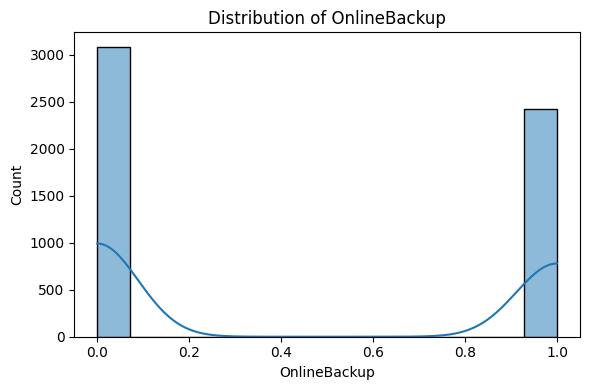

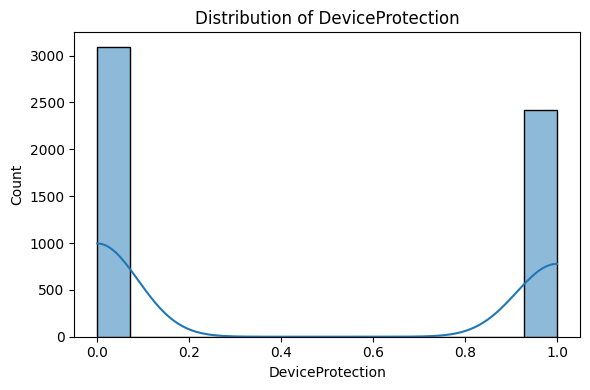

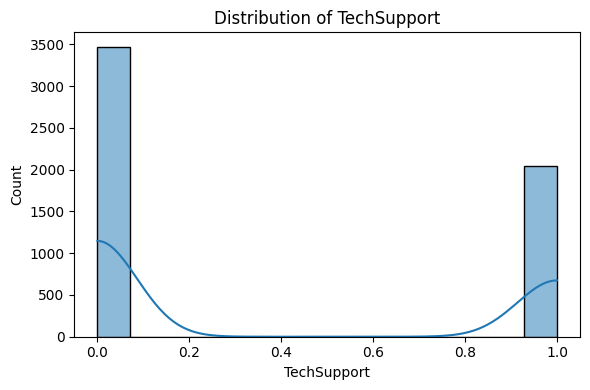

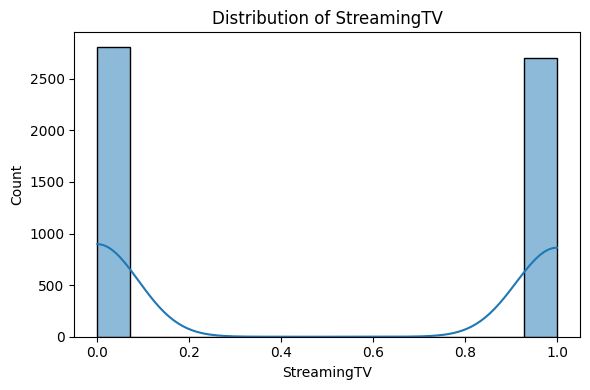

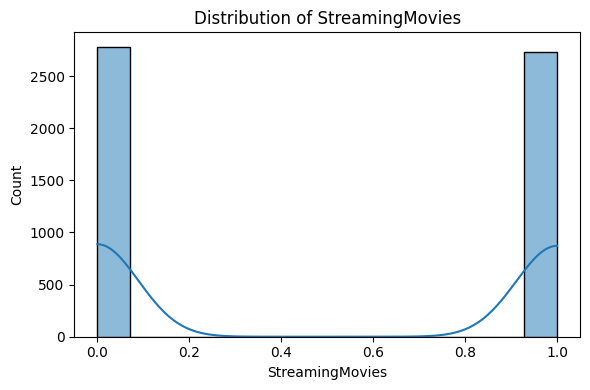

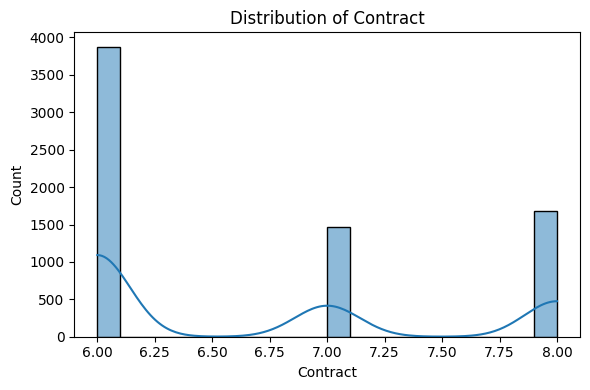

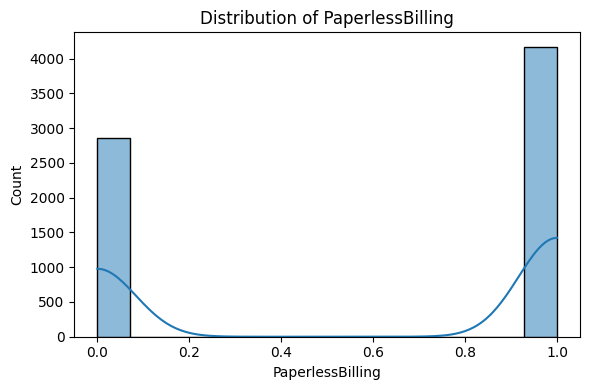

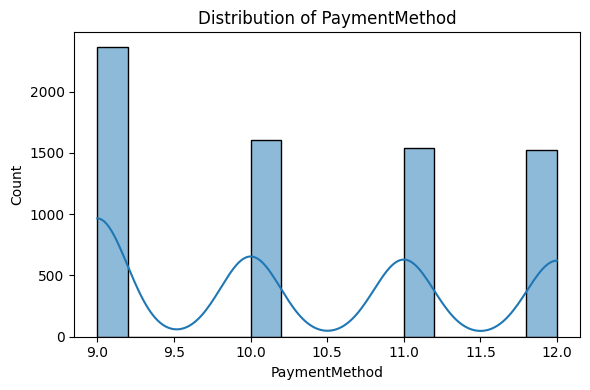

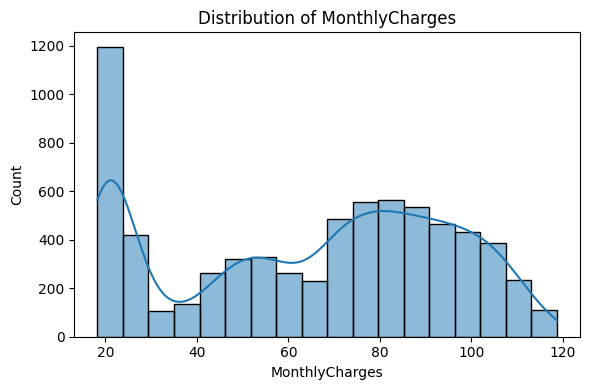

In [ ]:
# Histograms and KDE plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


BIVARIATE ANALYSIS

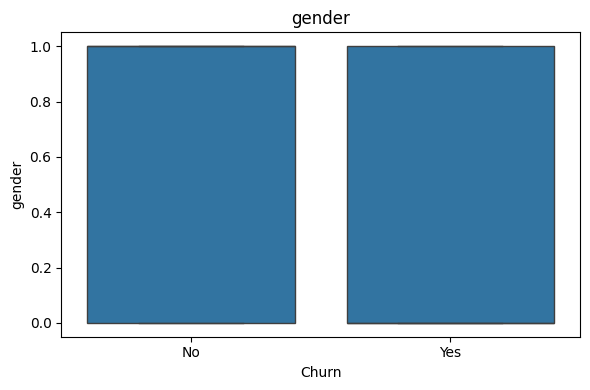

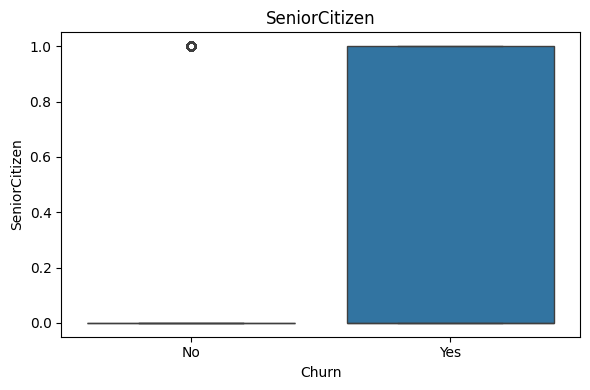

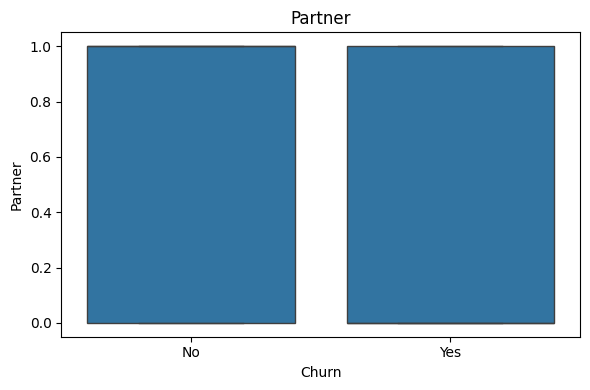

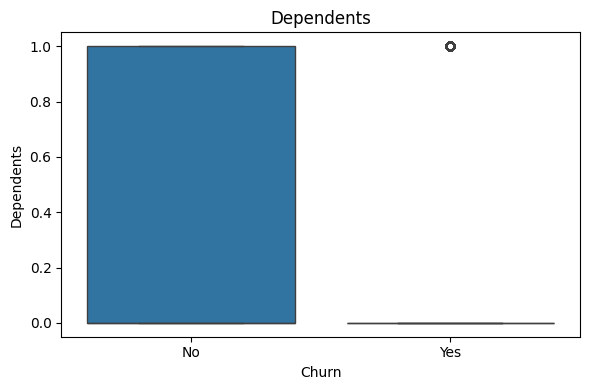

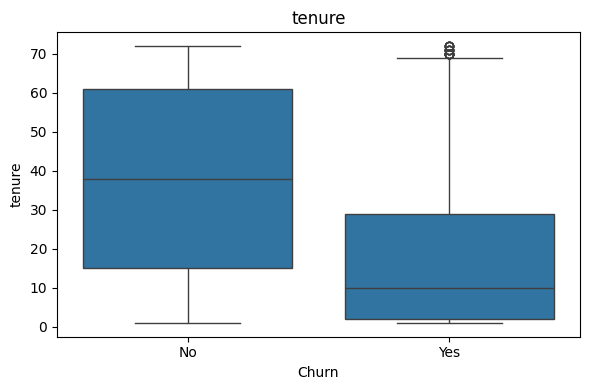

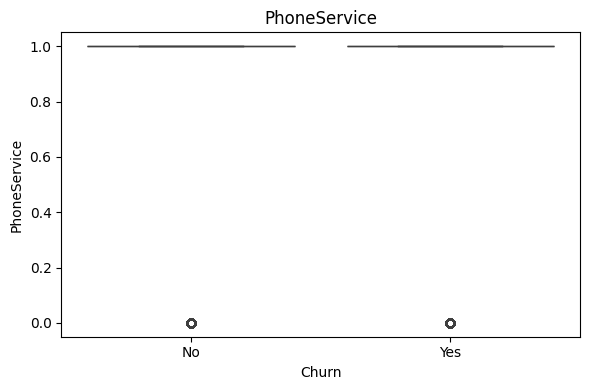

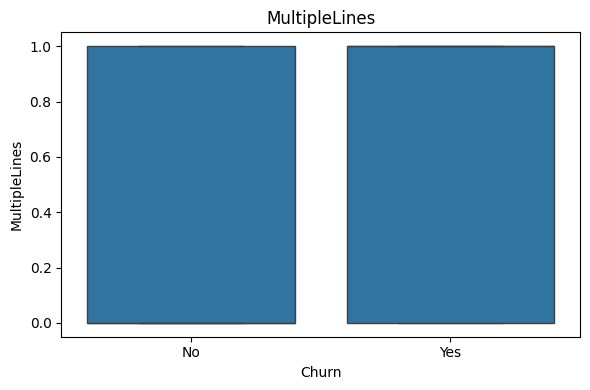

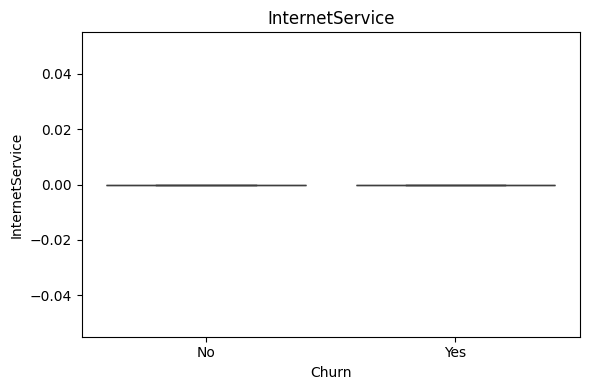

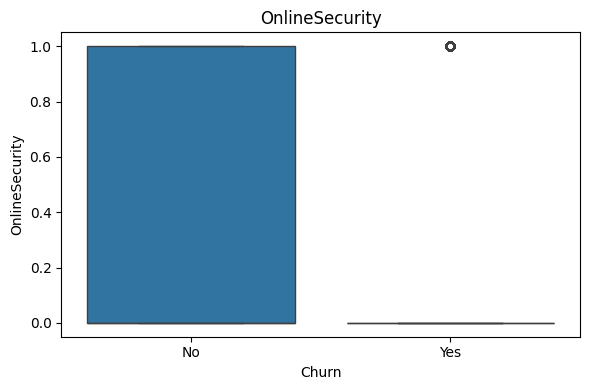

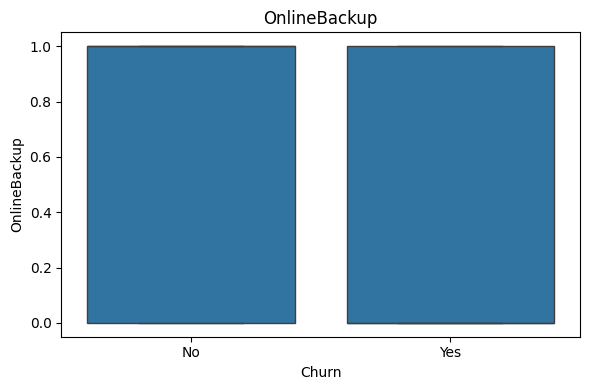

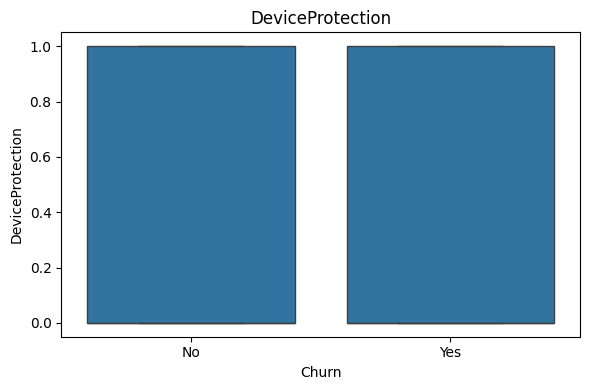

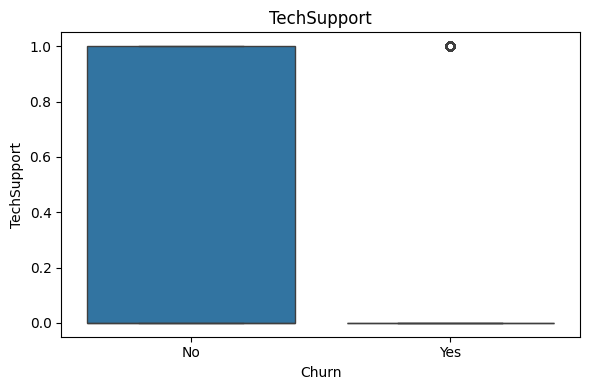

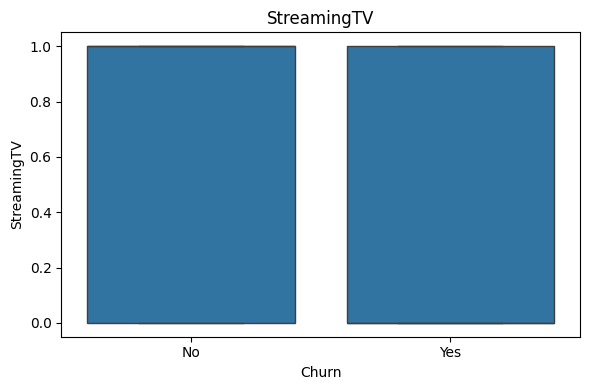

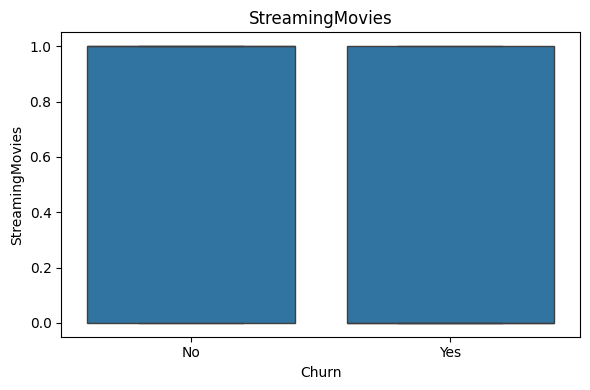

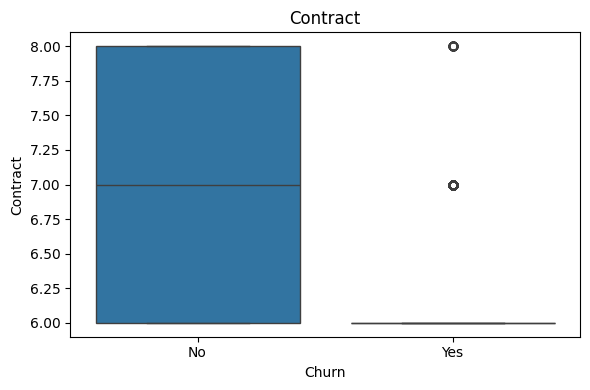

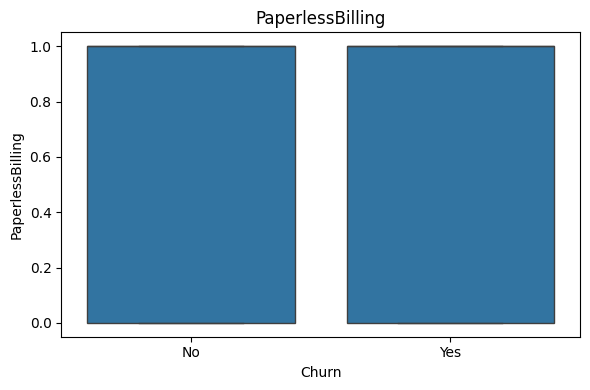

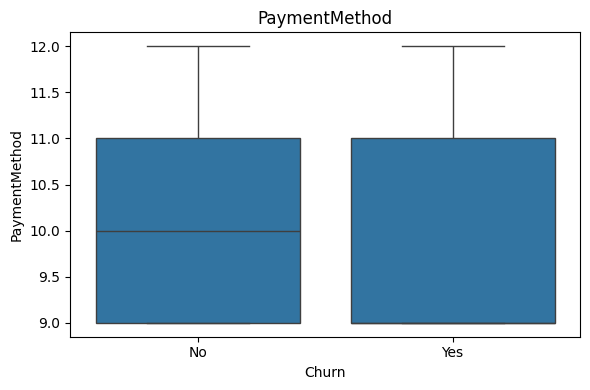

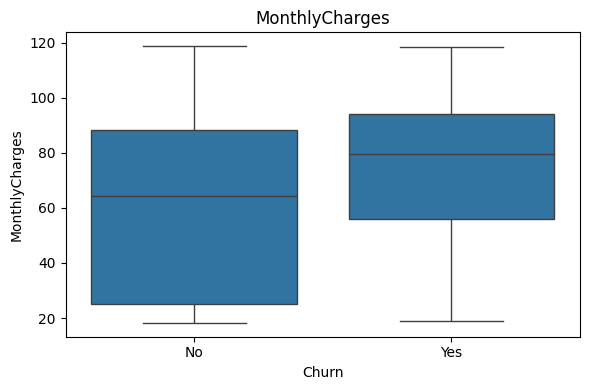

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col}')
    plt.tight_layout()
    plt.show()

MULTIVARIATE ANALYSIS

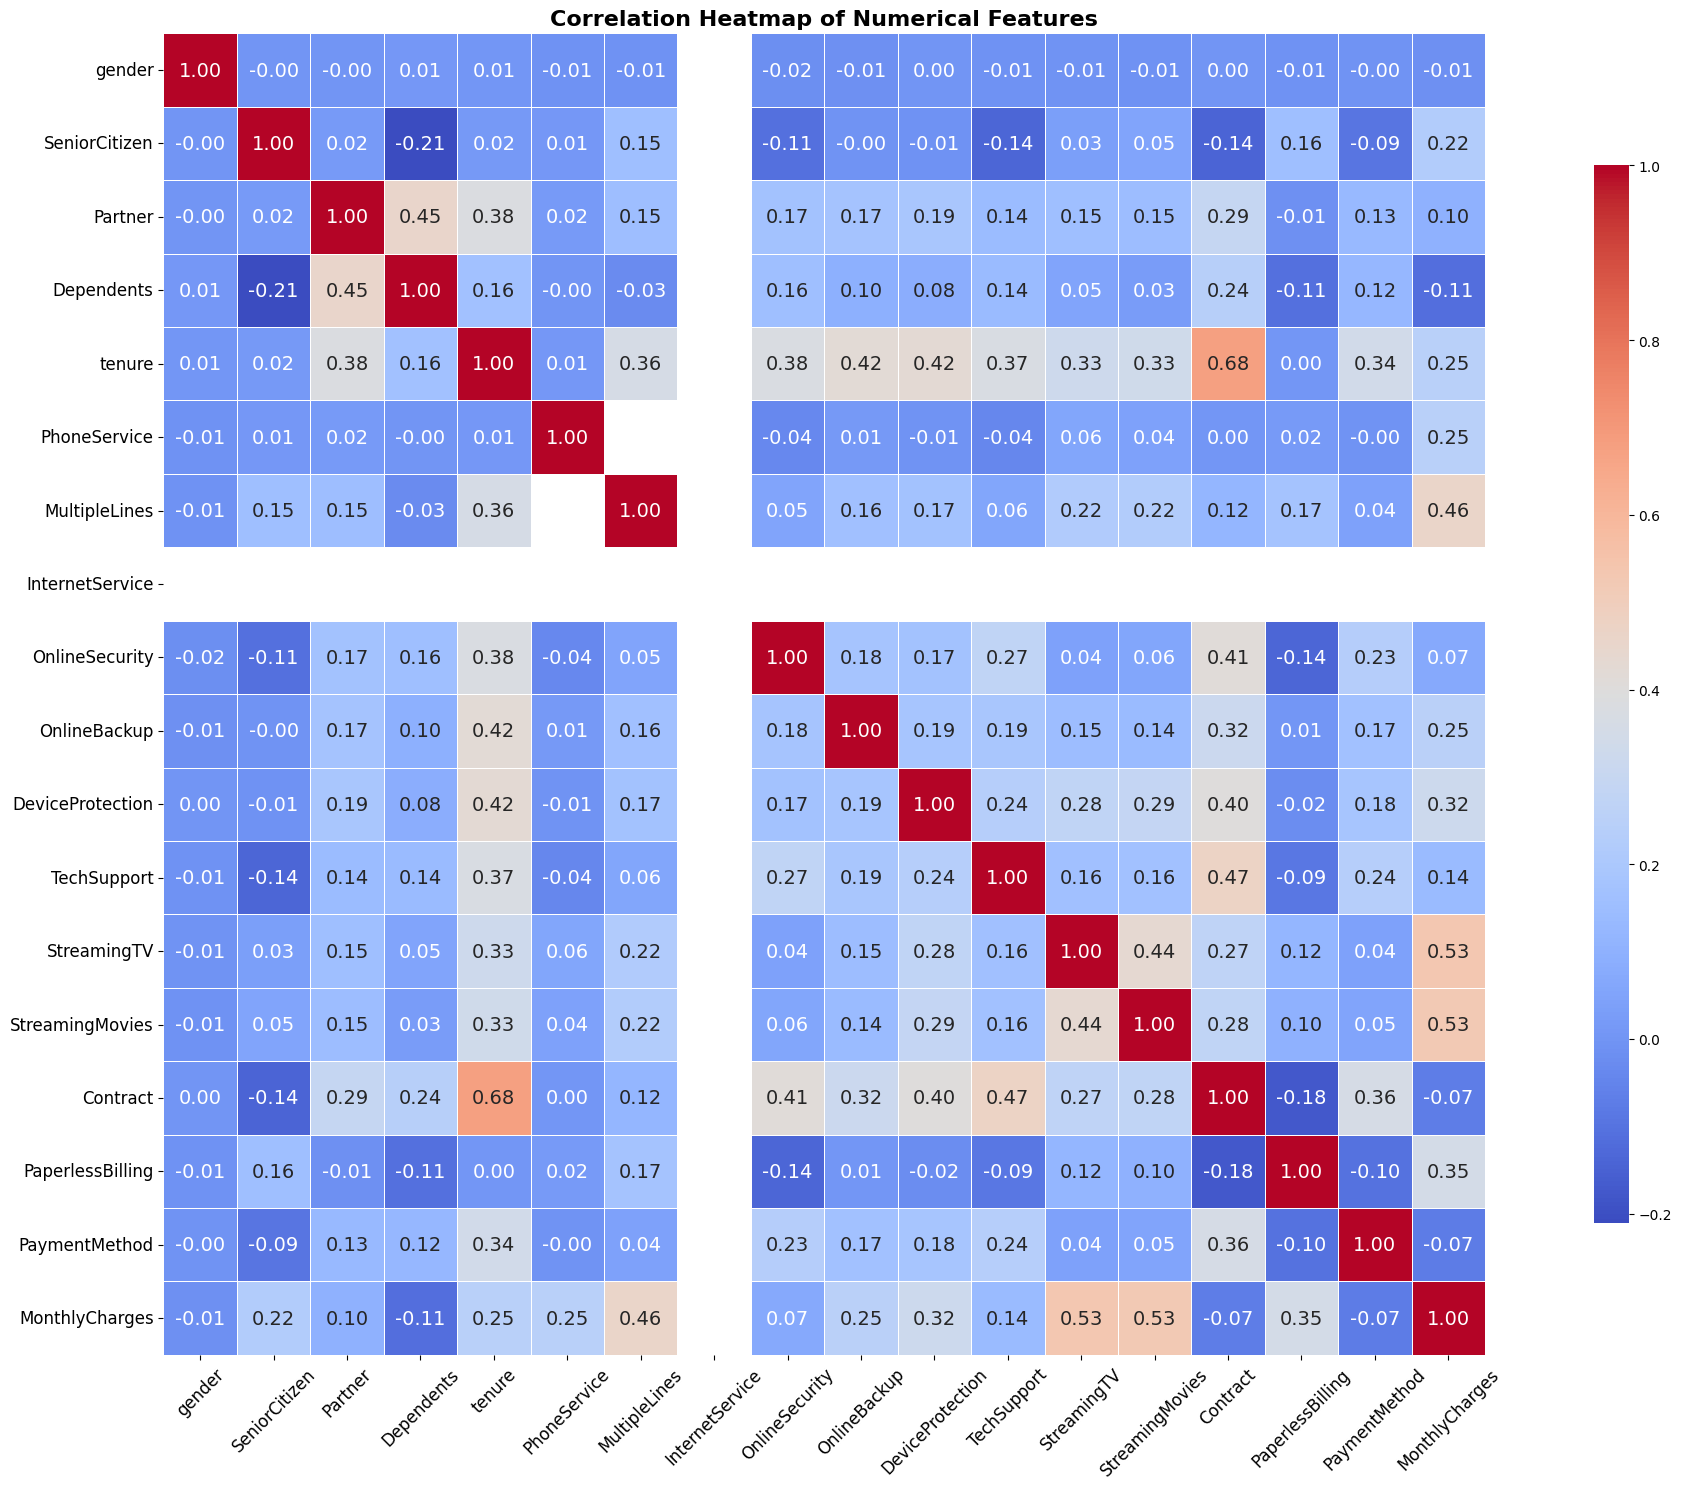

In [ ]:
plt.figure(figsize=(22, 15))  # Bigger figure
corr = df[numerical_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 14},  # Bigger font in cells
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "aspect": 30}
)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


TREE MAP

In [ ]:
df_treemap = df.dropna(subset=['Contract', 'InternetService', 'Churn'])
fig = px.treemap(
    df_treemap,
    path=['Contract', 'InternetService', 'Churn'],
    values='MonthlyCharges',
    color='Churn',
    title='Treemap: Churn by Contract & InternetService'
)
fig.show()


In [ ]:
# Drop nulls in path columns just like treemap
df_sunburst = df.dropna(subset=['Contract', 'InternetService', 'Churn'])

# Sunburst plot
fig = px.sunburst(
    df_sunburst,
    path=['Contract', 'InternetService', 'Churn'],
    values='MonthlyCharges',
    color='Churn',
    title='Sunburst Chart: Churn by Contract & InternetService'
)

fig.show()


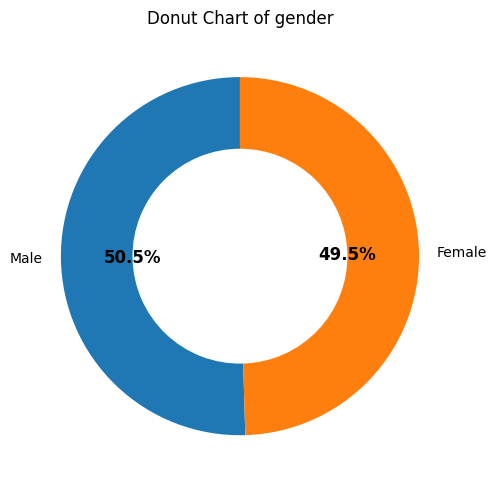

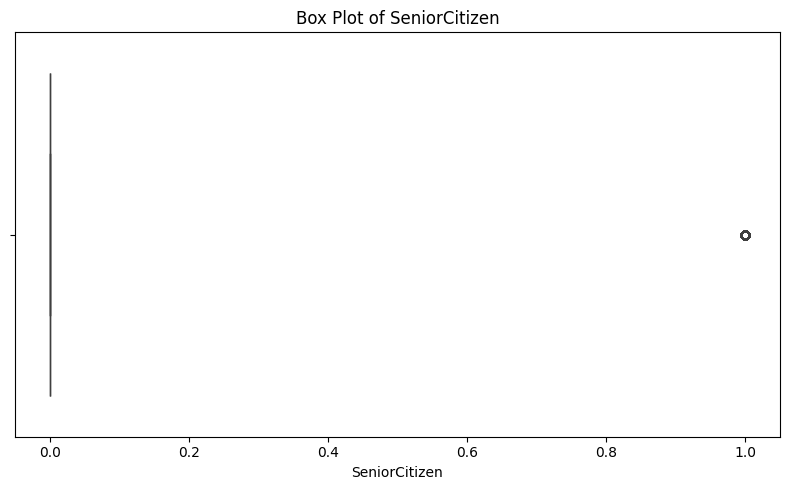

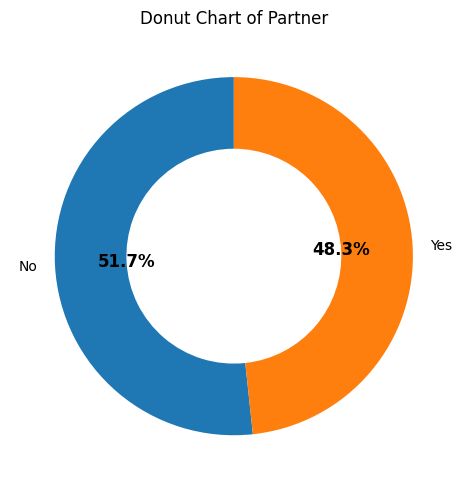

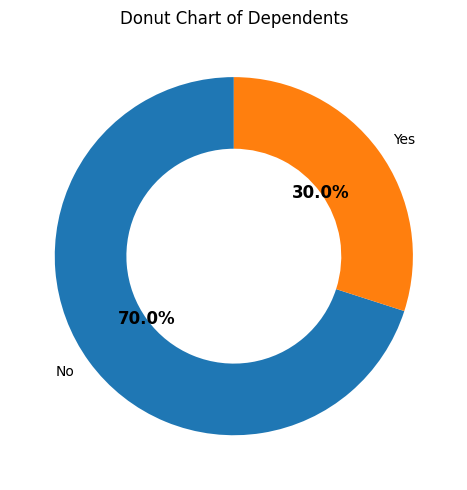

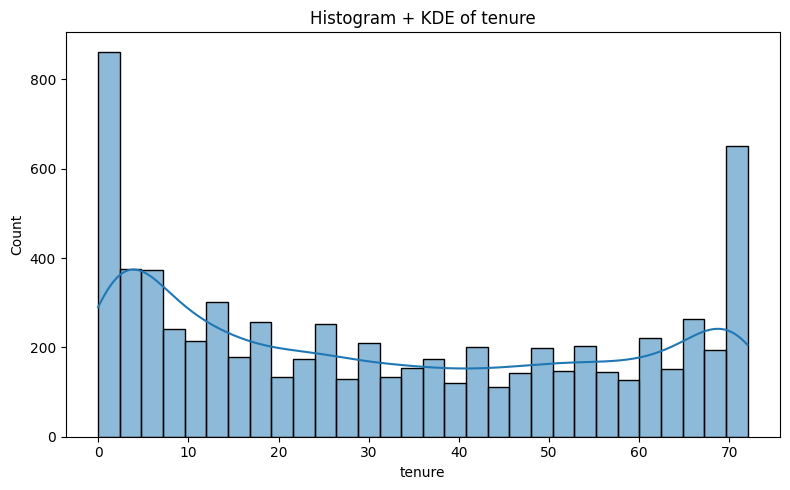

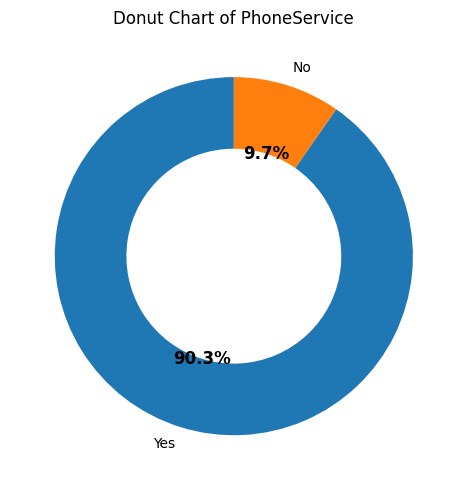

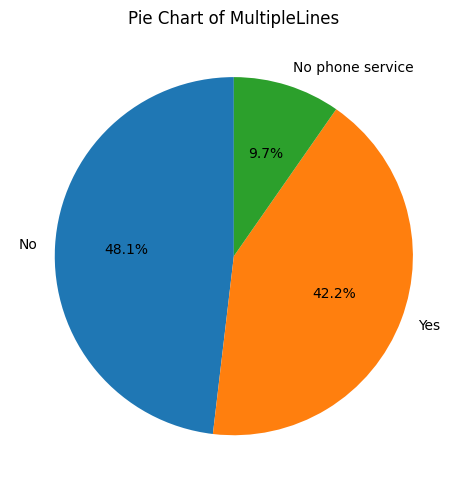

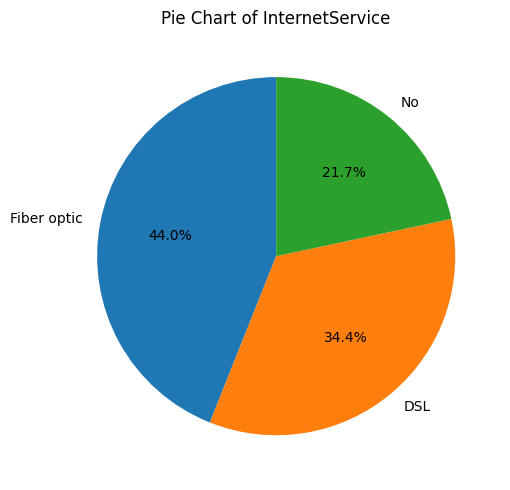

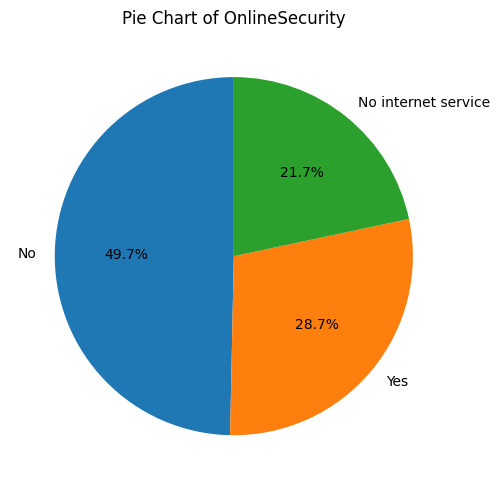

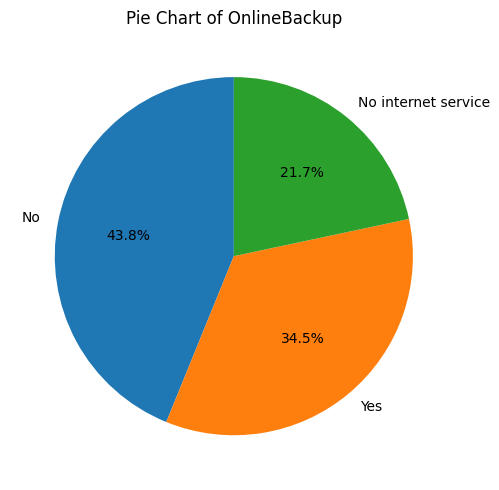

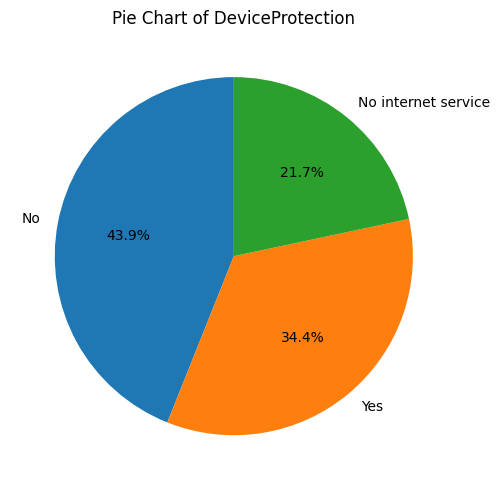

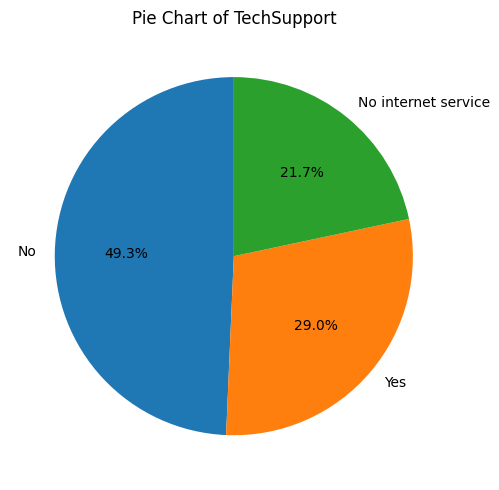

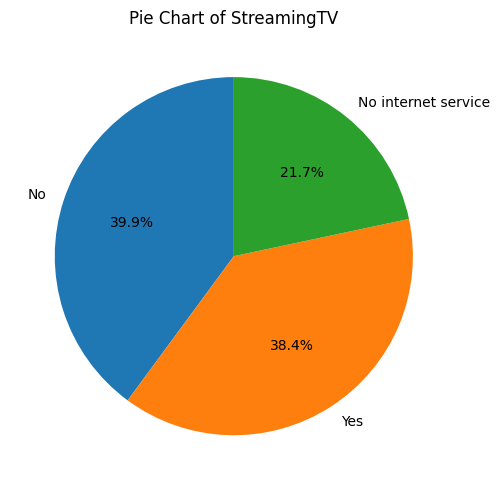

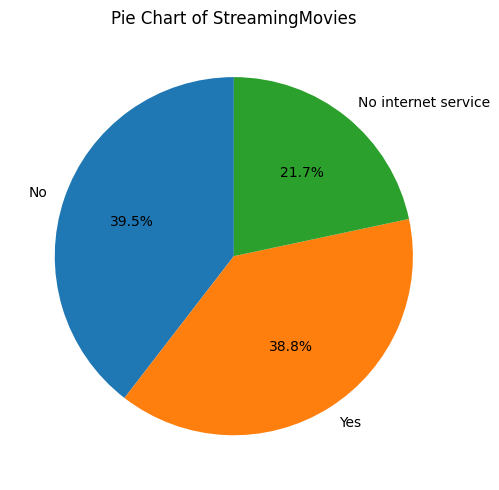

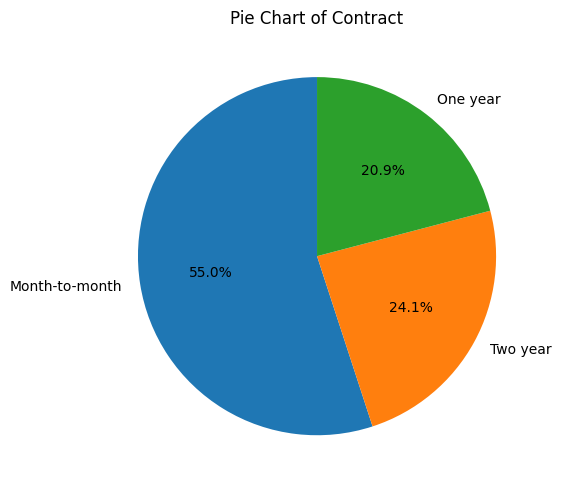

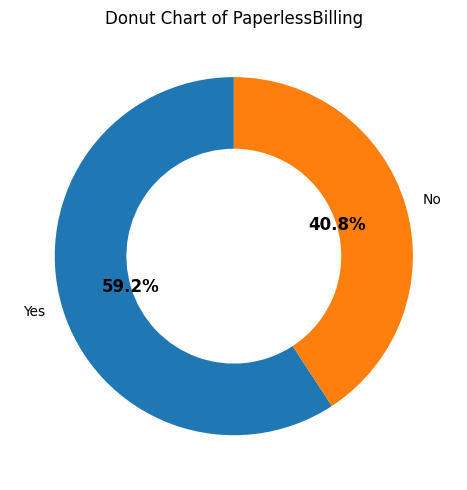

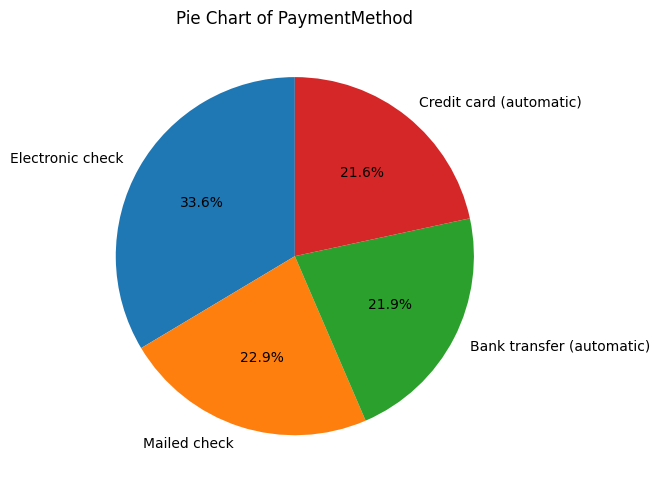

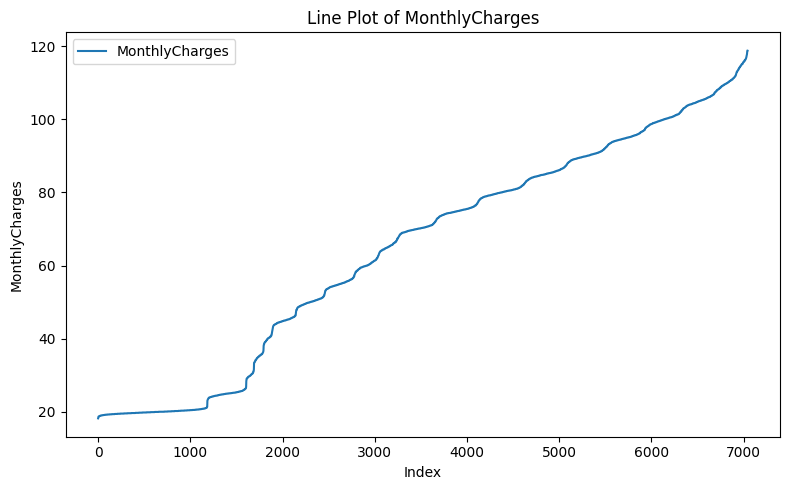

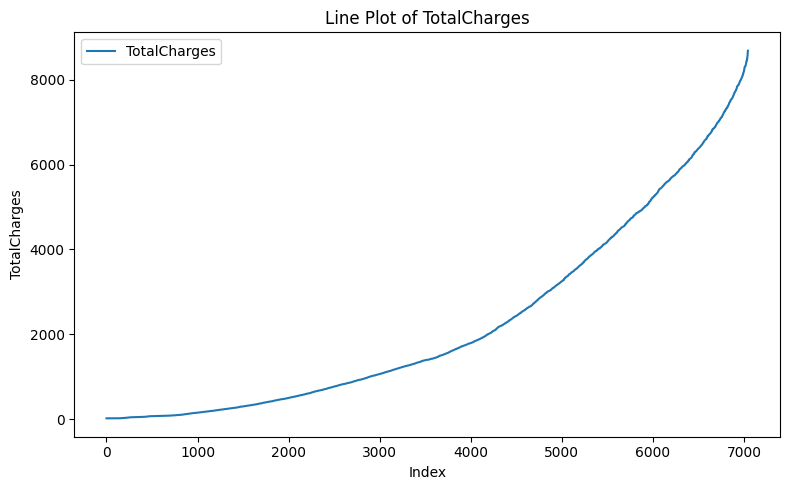

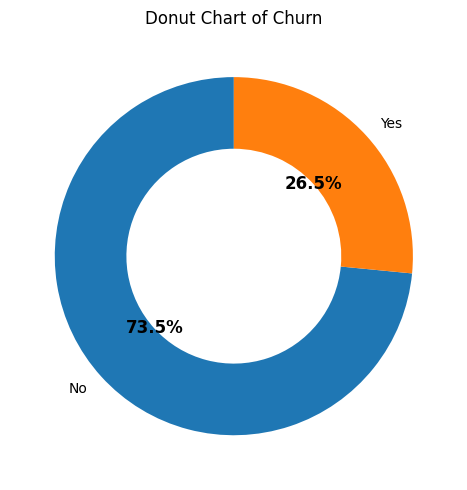

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean dataset
df = pd.read_csv('telco-customer-churn.csv')  # update path if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop('customerID', axis=1, inplace=True)

# Smart plotting function
def smart_plot(col):
    data = df[col]
    unique_vals = data.nunique()
    dtype = data.dtype

    plt.figure(figsize=(8, 5))

    # Pie / Donut Chart for binary categorical
    if dtype == 'object' and unique_vals == 2:
        wedges, texts, autotexts = plt.pie(data.value_counts(), labels=data.value_counts().index,
                                           autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
        plt.setp(autotexts, size=12, weight="bold")
        plt.title(f'Donut Chart of {col}')
        plt.gca().set_aspect('equal')
        plt.tight_layout()
        plt.show()

    # Pie chart for 3-5 categories
    elif dtype == 'object' and 2 < unique_vals <= 5:
        data.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {col}')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

    # Bar chart for 6-10 categories
    elif dtype == 'object' and 5 < unique_vals <= 10:
        sns.countplot(y=col, data=df, order=data.value_counts().index)
        plt.title(f'Horizontal Bar Chart of {col}')
        plt.tight_layout()
        plt.show()

    # Horizontal bar for >10 categories
    elif dtype == 'object' and unique_vals > 10:
        data.value_counts().head(15).plot(kind='barh', color='skyblue')
        plt.title(f'Bar Chart (Top 15) of {col}')
        plt.xlabel('Count')
        plt.tight_layout()
        plt.show()

    # Box plot for low-cardinality numeric
    elif dtype in ['int64', 'float64'] and unique_vals <= 10:
        sns.boxplot(x=data)
        plt.title(f'Box Plot of {col}')
        plt.tight_layout()
        plt.show()

    # Histogram + KDE for mid-range cardinality
    elif dtype in ['int64', 'float64'] and 10 < unique_vals < 100:
        sns.histplot(data, kde=True, bins=30)
        plt.title(f'Histogram + KDE of {col}')
        plt.tight_layout()
        plt.show()

    # Line plot for high-cardinality numeric
    elif dtype in ['int64', 'float64'] and unique_vals >= 100:
        df_sorted = df[[col]].sort_values(by=col).reset_index(drop=True)
        plt.plot(df_sorted[col], label=col)
        plt.title(f'Line Plot of {col}')
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        # Fallback histogram
        sns.histplot(data, kde=True)
        plt.title(f'Histogram of {col}')
        plt.tight_layout()
        plt.show()

# Run smart plotting for all columns
for col in df.columns:
    smart_plot(col)


#**PREDICTIVE ANALYSIS**

In [ ]:
df = pd.read_csv('telco-customer-churn.csv')  # Use the correct path again

In [ ]:
# performing label encoding
for col in df.columns:
    # we will only use 0 and 1 for binary values
    df.loc[df[col] == "Yes", col] = 1
    df.loc[df[col] == "No", col] = 0
    df.loc[df[col] == "Female", col] = 0
    df.loc[df[col] == "Male", col] = 1
    # everything else we will represent with a distinct integer
    df.loc[df[col] == "No phone service", col] = 2
    df.loc[df[col] == "No internet service", col] = 3
    df.loc[df[col] == "DSL", col] = 4
    df.loc[df[col] == "Fiber optic", col] = 5
    df.loc[df[col] == "Month-to-month", col] = 6
    df.loc[df[col] == "One year", col] = 7
    df.loc[df[col] == "Two year", col] = 8
    df.loc[df[col] == "Electronic check", col] = 9
    df.loc[df[col] == "Mailed check", col] = 10
    df.loc[df[col] == "Bank transfer (automatic)", col] = 11
    df.loc[df[col] == "Credit card (automatic)", col] = 12
    # we will set missing values to -1, so that we know that these correspond to missing values
    df.loc[df[col] == " ", col] = -1

In [ ]:
# obtaining list of all columns which we need to convert
cols_to_convert_to_int = df.columns[np.where(df.dtypes=="object")]
cols_to_convert_to_int = cols_to_convert_to_int[1:] # we are excluding the customerID column

In [ ]:
# converting each of the targeted columns to integer type
for col in cols_to_convert_to_int:
    df[col] = pd.to_numeric(df[col])

In [ ]:
# checking the data types
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df = df.drop([0]) # we are excluding the customerID column

Now that we have a dataset ready for analysis, we will split the dataset
into training and testing splits, using the 80/20% ratio.



In [ ]:
X = df.drop(['customerID','Churn'],axis=1)
Y = df['Churn']
# splitting the data into an 80% training/20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["method","accuracy","precision","recall","f1"]
final_results_no_smote = pd.DataFrame(columns=column_names)
final_results_smote = pd.DataFrame(columns=column_names)
final_results_hyp = pd.DataFrame(columns=column_names)

#**Stage One of Analysis**

Normal Predictions
In this section, we will use the four algorithms to generate predictions for churn.

#Naive Bayes

In [ ]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_predictions = nb.predict(X_test)

In [ ]:
nb_accuracy_score = accuracy_score(Y_test,nb_predictions)
nb_precision_score = precision_score(Y_test,nb_predictions)
nb_recall_score = recall_score(Y_test,nb_predictions)
nb_f1_score = f1_score(Y_test,nb_predictions)
nb_confusion = confusion_matrix(Y_test,nb_predictions)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Naive Bayes",nb_accuracy_score,nb_precision_score,nb_recall_score,nb_f1_score]

In [ ]:
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, Y_train)
dt_predictions = model_dt.predict(X_test)

In [ ]:
dt_accuracy_score = accuracy_score(Y_test,dt_predictions)
dt_precision_score = precision_score(Y_test,dt_predictions)
dt_recall_score = recall_score(Y_test,dt_predictions)
dt_f1_score = f1_score(Y_test,dt_predictions)
dt_confusion = confusion_matrix(Y_test,dt_predictions)

In [ ]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Descion Trees",dt_accuracy_score,dt_precision_score,dt_recall_score,dt_f1_score]

#**Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
lr_predictions = lr.predict(X_test)

In [ ]:
lr_accuracy_score = accuracy_score(Y_test,lr_predictions)
lr_precision_score = precision_score(Y_test,lr_predictions)
lr_recall_score = recall_score(Y_test,lr_predictions)
lr_f1_score = f1_score(Y_test,lr_predictions)
lr_confusion = confusion_matrix(Y_test,lr_predictions)

In [ ]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Logistic Regression",lr_accuracy_score,lr_precision_score,lr_recall_score,lr_f1_score]

#**Random Forest**

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, Y_train)
rf_predictions = rf.predict(X_test)
rf_predictions = [int(x) for x in np.round(rf_predictions,0)]

In [ ]:
rf_accuracy_score = accuracy_score(Y_test,rf_predictions)
rf_precision_score = precision_score(Y_test,rf_predictions)
rf_recall_score = recall_score(Y_test,rf_predictions)
rf_f1_score = f1_score(Y_test,rf_predictions)
rf_confusion = confusion_matrix(Y_test,rf_predictions)

In [ ]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Random Forest",rf_accuracy_score,rf_precision_score,rf_recall_score,rf_f1_score]

#**XGBoost**

In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,Y_train)
xgb_predictions = xgb_classifier.predict(X_test)

In [ ]:
xgb_accuracy_score = accuracy_score(Y_test,xgb_predictions)
xgb_precision_score = precision_score(Y_test,xgb_predictions)
xgb_recall_score = recall_score(Y_test,xgb_predictions)
xgb_f1_score = f1_score(Y_test,xgb_predictions)
xgb_confusion = confusion_matrix(Y_test,xgb_predictions)

In [ ]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["XGBoost",xgb_accuracy_score,xgb_precision_score,xgb_recall_score,xgb_f1_score]

#**Comparing Results for Stage One of Analysis**

#Now that we have built all four models for this stage of analysis (no SMOTE), we will compare the metrics of these models.

In [ ]:
# examining data table for this stage of analysis
final_results_no_smote

method  accuracy  precision    recall        f1
0          Naive Bayes  0.652236   0.415323  0.848901  0.557762
1        Descion Trees  0.797019   0.630000  0.519231  0.569277
2  Logistic Regression  0.810504   0.652038  0.571429  0.609078
3        Random Forest  0.789922   0.604938  0.538462  0.569767
4              XGBoost  0.793471   0.608309  0.563187  0.584879

We see that for this stage of analysis, the Naive Bayes model has the most varied confusion matrix, in terms of negatives and positives, however it has the smallest number of True Negatives, compared to the other three models. The other three models have consistent (with each other) proportions of Negatives and Positives.

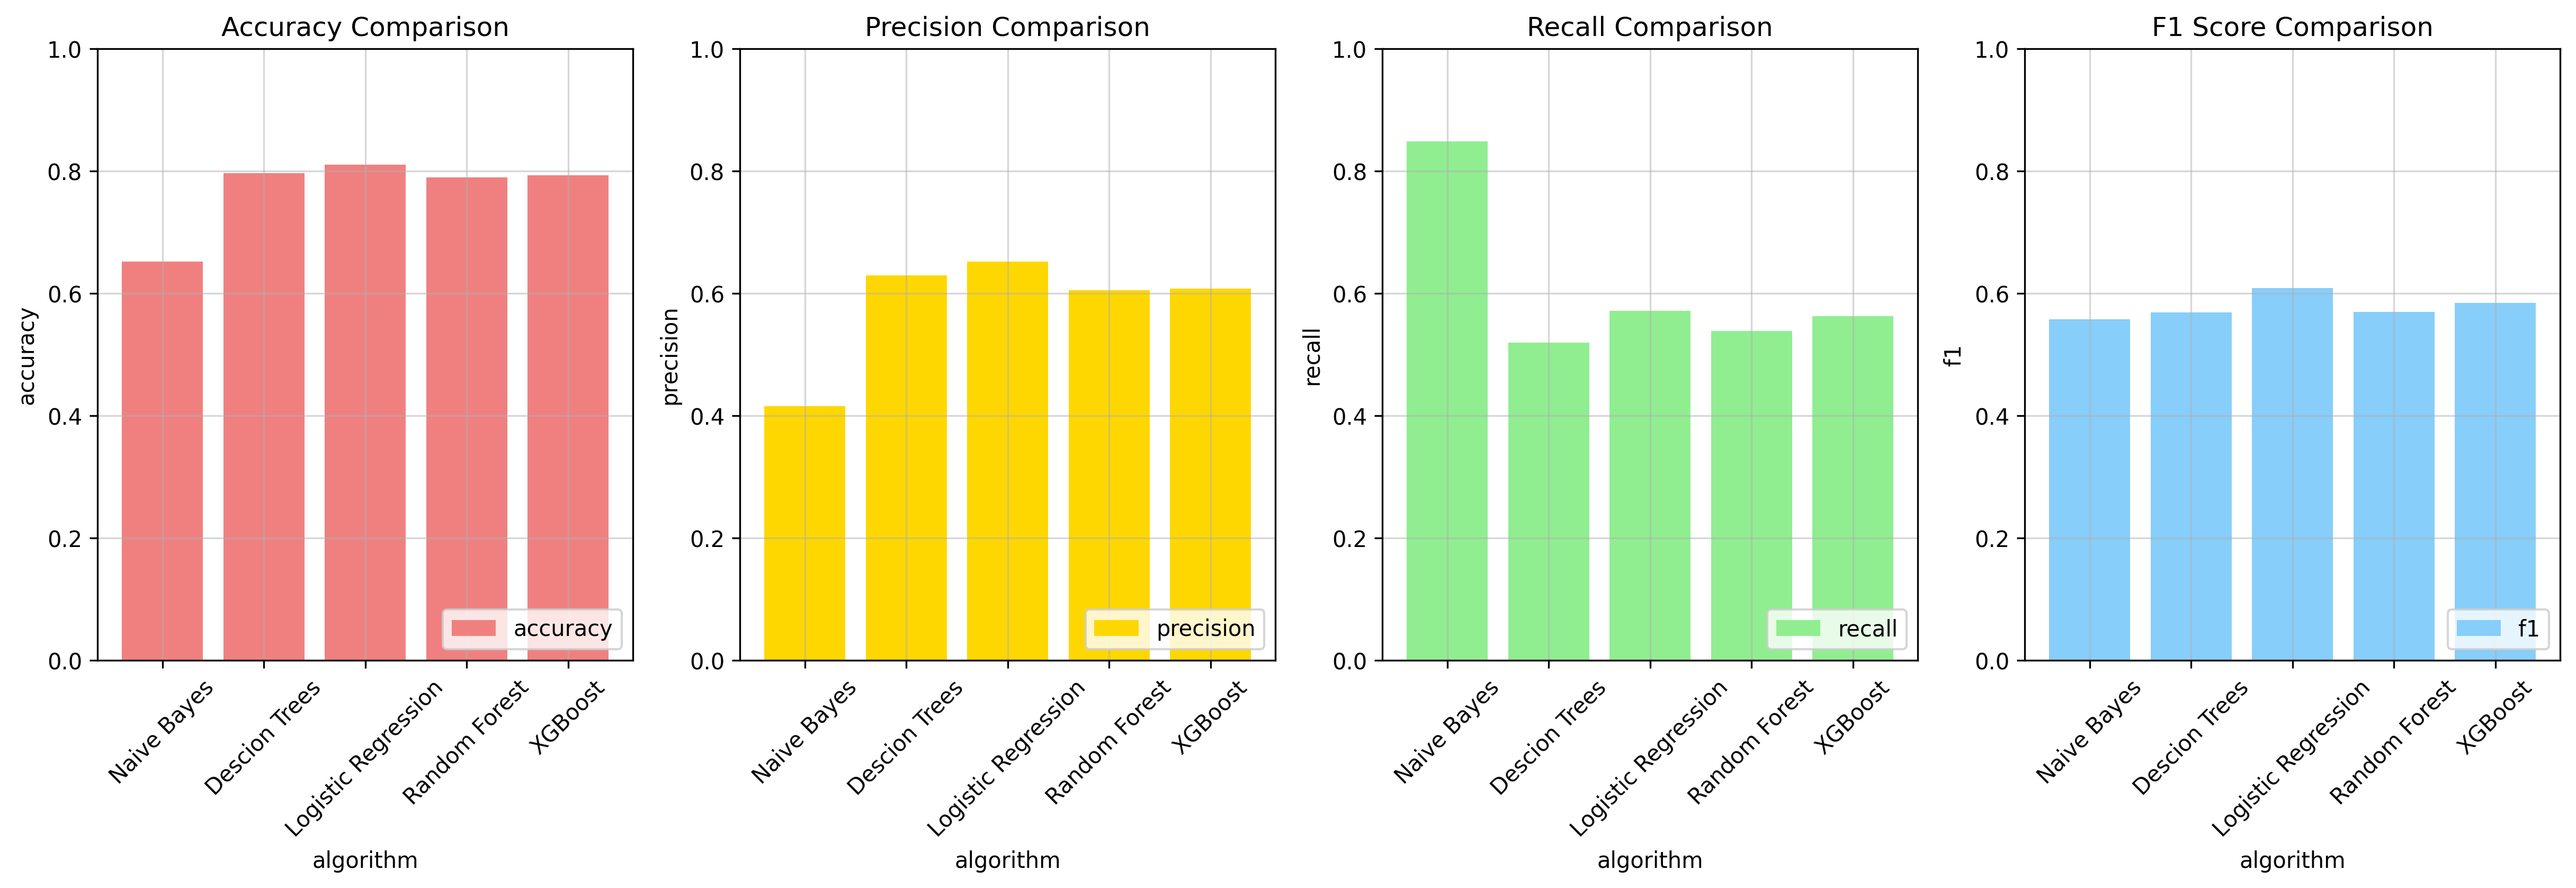

In [ ]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = final_results_no_smote['method']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,final_results_no_smote['accuracy'],color="lightcoral",alpha=1,label="accuracy")
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,final_results_no_smote['precision'],color="gold",alpha=1,label="precision")
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,final_results_no_smote['recall'],color="lightgreen",alpha=1,label="recall")
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,final_results_no_smote['f1'],color="lightskyblue",alpha=1,label="f1")
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

We see that for this stage of analysis, the Naive Bayes classifier has the highest recall. Since we are concerned with the recall metric, in this case, the Naive Bayes classfier is the best algorithm for predicting churn in this dataset.

#**Stage Two of Analysis - Predictions using SMOTE**

We will now repeat the same process as above, i.e. training the dataset using the four algorithms, and generating predictions for customer churn. However, this time, we will use SMOTE (Synthetic Minority Oversampling TechniquE) methodology. This method deals with imbalances in the dataset in regards to classification labels. Normally, due to the class imbalance, the majority class will have better performance than the minority class. SMOTE deals with this by oversampling the minority class.

In [ ]:
X = df.drop(['customerID','Churn'],axis=1)
Y = df['Churn']
# splitting the data into an 80% training/20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_train, Y_train)

#**Naive Bayes (SMOTE)**

In [ ]:
# naive bayes
nb_smote = GaussianNB()
nb_smote.fit(X_resampled, y_resampled)
nb_smote_predictions = nb_smote.predict(X_test)

In [ ]:
nb_smote_accuracy_score = accuracy_score(Y_test,nb_smote_predictions)
nb_smote_precision_score = precision_score(Y_test,nb_smote_predictions)
nb_smote_recall_score = recall_score(Y_test,nb_smote_predictions)
nb_smote_f1_score = f1_score(Y_test,nb_smote_predictions)
nb_smote_confusion = confusion_matrix(Y_test,nb_smote_predictions)

In [ ]:
final_results_smote.loc[len(final_results_smote)] = ["Naive Bayes",nb_smote_accuracy_score,nb_smote_precision_score,nb_smote_recall_score,nb_smote_f1_score]

In [ ]:
# Train-test split for resampled data
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Decision Tree Classifier with SMOTEENN
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train, yr_train)

# Predict and evaluate Decision Tree model
yr_predict = model_dt_smote.predict(xr_test)
dt_accuracy_score = accuracy_score(yr_test, yr_predict)
model_score_r = model_dt_smote.score(xr_test, yr_test)

print("Decision Tree Accuracy Score:", dt_accuracy_score)
print("Model Score (Accuracy):", model_score_r)
print(classification_report(yr_test, yr_predict))

# Storing final results
final_results_smote.loc[len(final_results_smote)] = ["Decision Tree", dt_accuracy_score, model_score_r, nb_smote_recall_score, nb_smote_f1_score]


Decision Tree Accuracy Score: 0.9243243243243243
Model Score (Accuracy): 0.9243243243243243
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       436
           1       0.92      0.94      0.93       489

    accuracy                           0.92       925
   macro avg       0.92      0.92      0.92       925
weighted avg       0.92      0.92      0.92       925



In [ ]:
final_results_smote.loc[len(final_results_smote)] = ["Decison Tree",dt_accuracy_score,model_score_r,nb_smote_recall_score,nb_smote_f1_score]

In [ ]:
from sklearn import metrics

# Train the model
model_dt_smote.fit(xr_train, yr_train)

# Make predictions
yr_predict = model_dt_smote.predict(xr_test)

# Get the accuracy score
model_score_r = model_dt_smote.score(xr_test, yr_test)  # This returns the accuracy

# Print the accuracy
print("Accuracy:", model_score_r)

# Print the classification report
print(metrics.classification_report(yr_test, yr_predict))

Accuracy: 0.9243243243243243
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       436
           1       0.92      0.94      0.93       489

    accuracy                           0.92       925
   macro avg       0.92      0.92      0.92       925
weighted avg       0.92      0.92      0.92       925



#**Logistic Regression (SMOTE)**

In [ ]:
lr_smote = LogisticRegression(random_state=0)
lr_smote.fit(X_resampled, y_resampled)
lr_smote_predictions = lr_smote.predict(X_test)

In [ ]:
lr_smote_accuracy_score = accuracy_score(Y_test,lr_smote_predictions)
lr_smote_precision_score = precision_score(Y_test,lr_smote_predictions)
lr_smote_recall_score = recall_score(Y_test,lr_smote_predictions)
lr_smote_f1_score = f1_score(Y_test,lr_smote_predictions)
lr_smote_confusion = confusion_matrix(Y_test,lr_smote_predictions)

In [ ]:
final_results_smote.loc[len(final_results_smote)] = ["Logistic Regression",lr_smote_accuracy_score,lr_smote_precision_score,lr_smote_recall_score,lr_smote_f1_score]

#**Random Forest (SMOTE)**

In [ ]:
rf_smote = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_smote.fit(X_resampled, y_resampled)
rf_smote_predictions = rf_smote.predict(X_test)
rf_smote_predictions = [int(x) for x in np.round(rf_smote_predictions,0)]

In [ ]:
rf_smote_accuracy_score = accuracy_score(Y_test,rf_smote_predictions)
rf_smote_precision_score = precision_score(Y_test,rf_smote_predictions)
rf_smote_recall_score = recall_score(Y_test,rf_smote_predictions)
rf_smote_f1_score = f1_score(Y_test,rf_smote_predictions)
rf_smote_confusion = confusion_matrix(Y_test,rf_smote_predictions)

In [ ]:
final_results_smote.loc[len(final_results_smote)] = ["Random Forest",rf_smote_accuracy_score,rf_smote_precision_score,rf_smote_recall_score,rf_smote_f1_score]

#**XGB Boost (SMOTE)**

In [ ]:
xgb_smote = xgb.XGBClassifier()
xgb_smote.fit(X_resampled, y_resampled)
xgb_smote_predictions = xgb_smote.predict(X_test)

In [ ]:
xgb_smote_accuracy_score = accuracy_score(Y_test,xgb_smote_predictions)
xgb_smote_precision_score = precision_score(Y_test,xgb_smote_predictions)
xgb_smote_recall_score = recall_score(Y_test,xgb_smote_predictions)
xgb_smote_f1_score = f1_score(Y_test,xgb_smote_predictions)
xgb_smote_confusion = confusion_matrix(Y_test,xgb_smote_predictions)

In [ ]:
final_results_smote.loc[len(final_results_smote)] = ["XGBoost",xgb_smote_accuracy_score,xgb_smote_precision_score,xgb_smote_recall_score,xgb_smote_f1_score]

#**Comparing Results for Stage Two of Analysis**

Now that we have built all four models for this stage of analysis (SMOTE), we will compare the metrics of these models.

In [ ]:
# examining data table for this stage of analysis
final_results_smote

method  accuracy  precision    recall        f1
0          Naive Bayes  0.706175   0.461890  0.832418  0.594118
1          Naive Bayes  0.706175   0.461890  0.832418  0.594118
2        Decision Tree  0.924324   0.924324  0.832418  0.594118
3         Decison Tree  0.924324   0.924324  0.832418  0.594118
4  Logistic Regression  0.730305   0.486348  0.782967  0.600000
5        Random Forest  0.755855   0.519685  0.725275  0.605505
6              XGBoost  0.757984   0.522505  0.733516  0.610286

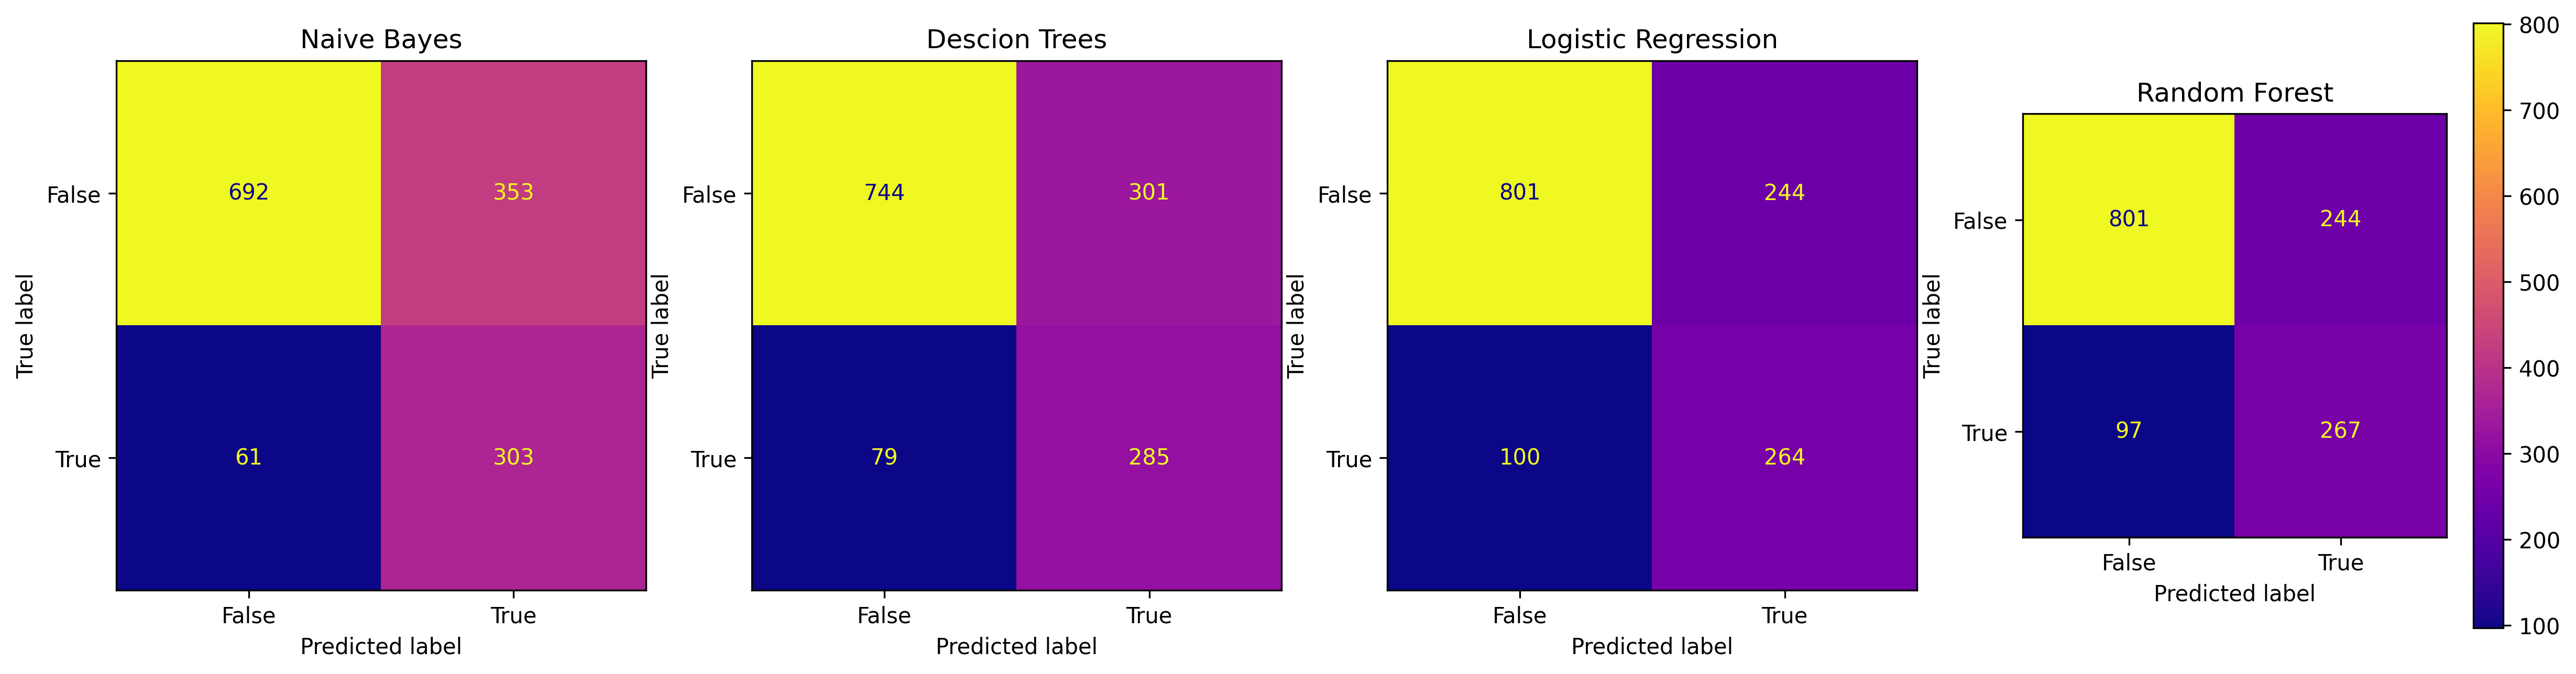

In [ ]:
# comparing confusion matrices for this stage of analysis
fig, ax = plt.subplots(1,4,sharex=False, sharey=False, figsize=(20, 5), dpi=300)
ax[0].set_title(x_labels[0])
ax[1].set_title(x_labels[1])
ax[2].set_title(x_labels[2])
ax[3].set_title(x_labels[3])

ConfusionMatrixDisplay(nb_smote_confusion,display_labels=[False,True]).plot(ax=ax[0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(lr_smote_confusion,display_labels=[False,True]).plot(ax=ax[1],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(rf_smote_confusion,display_labels=[False,True]).plot(ax=ax[2],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(xgb_smote_confusion,display_labels=[False,True]).plot(ax=ax[3],cmap='plasma',colorbar=True)
fig.show()

We find that Naive Bayes has the most varied confusion matrix, but has the least number of True Negatives. The other three models have similar proportions to each other in terms of Negatives and Postives.

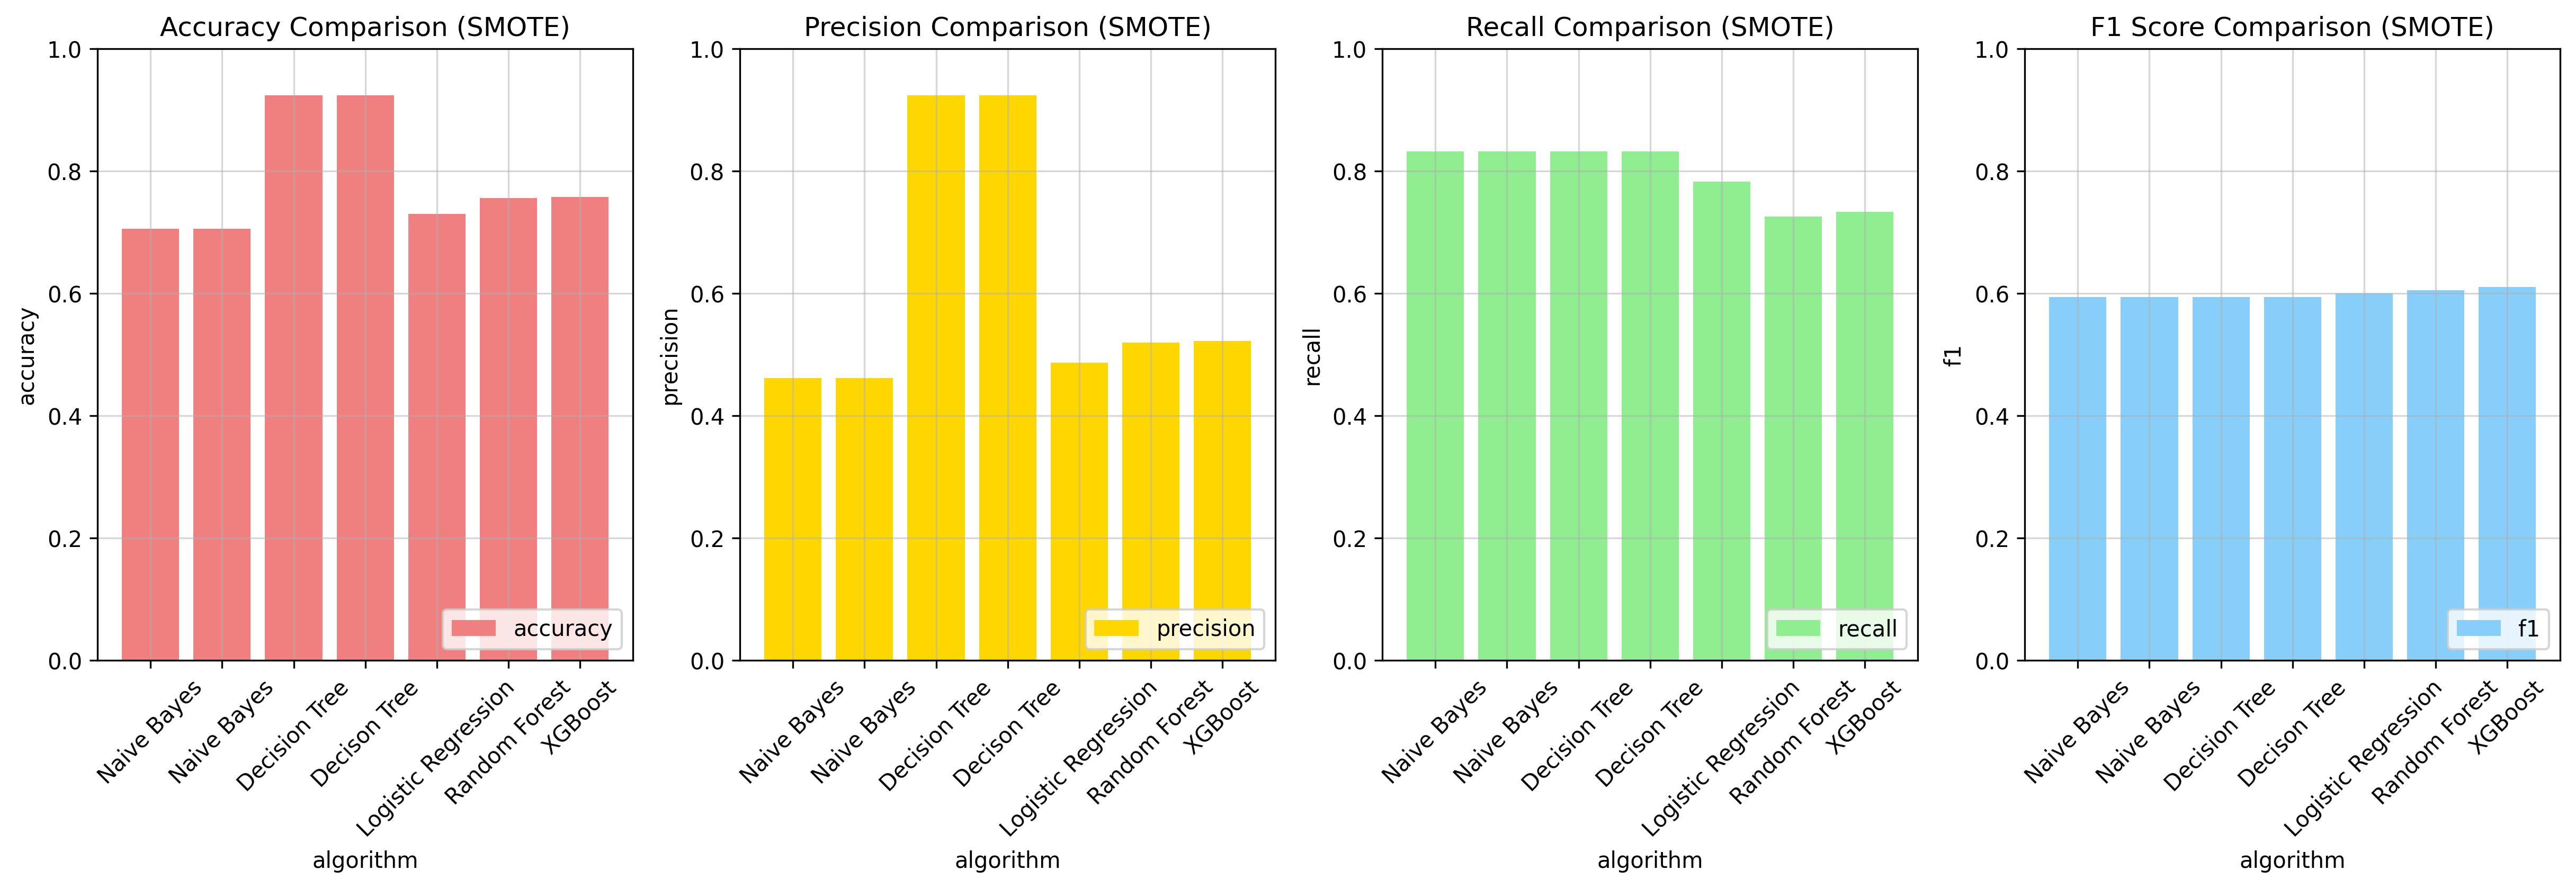

In [ ]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = final_results_smote['method']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,final_results_smote['accuracy'],color="lightcoral",alpha=1,label="accuracy")
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison (SMOTE)")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,final_results_smote['precision'],color="gold",alpha=1,label="precision")
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison (SMOTE)")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,final_results_smote['recall'],color="lightgreen",alpha=1,label="recall")
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison (SMOTE)")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,final_results_smote['f1'],color="lightskyblue",alpha=1,label="f1")
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison (SMOTE)")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

In terms of recall, we find that the Naive Bayes method provides the best set of predictions of customer churn, compared to the other models.

## Stage Three of Analysis - Predictions using Hyperparameter Tuning (only for Random Forests and XGBoost)

### Random Forests - Hyperparameter Tuning

We will start by getting the current parameters for the Random Forest model (no SMOTE) that we obtained earlier.

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# estimating the parameters
est_rf_params = {
    'n_estimators':np.arange(10,1000,10),
    'max_features':['auto','sqrt'],
    'max_depth':np.arange(1,11,1),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True]
}

In [ ]:
# using estimated parameter grid and doing RandomizedSearchCV before fitting
est_rf_hyp_model = RandomForestRegressor(random_state = 42)
est_rf_hyp = RandomizedSearchCV(est_rf_hyp_model,est_rf_params,n_iter=10,cv=3,n_jobs=-1)
est_rf_hyp.fit(X_train, Y_train)
est_rf_hyp_predictions = est_rf_hyp.predict(X_test)
est_rf_hyp_predictions = [int(x) for x in np.round(est_rf_hyp_predictions,0)];

In [ ]:
# Calculate evaluation metrics
est_rf_hyp_accuracy_score = accuracy_score(Y_test, est_rf_hyp_predictions)
est_rf_hyp_precision_score = precision_score(Y_test, est_rf_hyp_predictions)
est_rf_hyp_recall_score = recall_score(Y_test, est_rf_hyp_predictions)
est_rf_hyp_f1_score = f1_score(Y_test, est_rf_hyp_predictions)

# Store results in final_results_hyp DataFrame
final_results_hyp.loc[len(final_results_hyp)] = [
    "Random Forest - RandomizedSearchCV",
    est_rf_hyp_accuracy_score,
    est_rf_hyp_precision_score,
    est_rf_hyp_recall_score,
    est_rf_hyp_f1_score
]

We have obtained a first set of best hyperparameters using the RandomizedSearchCV method, which search randomly from the parameter space to obtain the best-fitting parameters. We will now pass these obtained parameters again into the model, but this time use the GridSearchCV method to see if they can be further optimized.

In [ ]:
# getting obtained best paramters from RandomizedSearchCV
rf_hyp_params = est_rf_hyp.best_params_
print(rf_hyp_params)

{'n_estimators': np.int64(880), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': np.int64(8), 'bootstrap': True}


In [ ]:
# converting these parameters to be read
rf_hyp_param_values = {}
for key, value in rf_hyp_params.items():
    rf_hyp_param_values[key] = [value]
print(rf_hyp_param_values)

{'n_estimators': [np.int64(880)], 'min_samples_split': [10], 'min_samples_leaf': [1], 'max_features': ['sqrt'], 'max_depth': [np.int64(8)], 'bootstrap': [True]}


In [ ]:
# using obtained best parameters and doing GridSearchCV before fitting
rf_hyp_model = RandomForestRegressor(random_state = 42)
rf_hyp = GridSearchCV(rf_hyp_model,rf_hyp_param_values,cv=3,n_jobs=-1)
rf_hyp.fit(X_train, Y_train)
rf_hyp_predictions = rf_hyp.predict(X_test)
rf_hyp_predictions = [int(x) for x in np.round(rf_hyp_predictions,0)]

In [ ]:
rf_hyp_accuracy_score = accuracy_score(Y_test,rf_hyp_predictions)
rf_hyp_precision_score = precision_score(Y_test,rf_hyp_predictions)
rf_hyp_recall_score = recall_score(Y_test,rf_hyp_predictions)
rf_hyp_f1_score = f1_score(Y_test,rf_hyp_predictions)
rf_hyp_confusion = confusion_matrix(Y_test,rf_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["Random Forest - GridSearchCV",rf_hyp_accuracy_score,rf_hyp_precision_score,rf_hyp_recall_score,rf_hyp_f1_score]

#**XGBoost - Hyperparameter Tuning**

We repeat the same hyperparameter tuning process as before.

In [ ]:
# estimating the parameters
est_xgb_params = {
    'n_estimators':np.arange(10,1000,10),
    'max_features':['auto','sqrt'],
    'max_depth':np.arange(1,11,1),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True]
}

In [ ]:
# using estimated parameter grid and doing RandomizedSearchCV before fitting
est_xgb_hyp_model = RandomForestRegressor(random_state = 42)
est_xgb_hyp = RandomizedSearchCV(est_xgb_hyp_model,est_xgb_params,n_iter=10,cv=3,n_jobs=-1)
est_xgb_hyp.fit(X_train, Y_train)
est_xgb_hyp_predictions = est_xgb_hyp.predict(X_test)
est_xgb_hyp_predictions = [int(x) for x in np.round(est_xgb_hyp_predictions,0)];

In [ ]:
est_xgb_hyp_accuracy_score = accuracy_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_precision_score = precision_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_recall_score = recall_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_f1_score = f1_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_confusion = confusion_matrix(Y_test,est_xgb_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["XGBoost - RandomizedSearchCV",est_xgb_hyp_accuracy_score,est_xgb_hyp_precision_score,est_xgb_hyp_recall_score,est_xgb_hyp_f1_score]

In [ ]:
# getting obtained best paramters from RandomizedSearchCV
xgb_hyp_params = est_xgb_hyp.best_params_
print(xgb_hyp_params)

{'n_estimators': np.int64(490), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': np.int64(9), 'bootstrap': True}


In [ ]:
# converting these parameters to be read
xgb_hyp_param_values = {}
for key, value in xgb_hyp_params.items():
    xgb_hyp_param_values[key] = [value]
print(xgb_hyp_param_values)

{'n_estimators': [np.int64(490)], 'min_samples_split': [5], 'min_samples_leaf': [2], 'max_features': ['sqrt'], 'max_depth': [np.int64(9)], 'bootstrap': [True]}


In [ ]:
# using obtained best parameters and doing GridSearchCV before fitting
xgb_hyp_model = RandomForestRegressor(random_state = 42)
xgb_hyp = GridSearchCV(xgb_hyp_model,xgb_hyp_param_values,cv=3,n_jobs=-1)
xgb_hyp.fit(X_train, Y_train)
xgb_hyp_predictions = xgb_hyp.predict(X_test)
xgb_hyp_predictions = [int(x) for x in np.round(xgb_hyp_predictions,0)];

In [ ]:
xgb_hyp_accuracy_score = accuracy_score(Y_test,xgb_hyp_predictions)
xgb_hyp_precision_score = precision_score(Y_test,xgb_hyp_predictions)
xgb_hyp_recall_score = recall_score(Y_test,xgb_hyp_predictions)
xgb_hyp_f1_score = f1_score(Y_test,xgb_hyp_predictions)
xgb_hyp_confusion = confusion_matrix(Y_test,xgb_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["XGBoost - GridSearchCV",xgb_hyp_accuracy_score,xgb_hyp_precision_score,xgb_hyp_recall_score,xgb_hyp_f1_score]

### Comparing Results (Hyperparameter Tuning)

In [ ]:
# examining data table for this stage of analysis
final_results_hyp

method  accuracy  precision    recall        f1
0  Random Forest - RandomizedSearchCV  0.799148   0.631922  0.532967  0.578241
1        Random Forest - GridSearchCV  0.799148   0.631922  0.532967  0.578241
2        XGBoost - RandomizedSearchCV  0.799148   0.629393  0.541209  0.581979
3        XGBoost - RandomizedSearchCV  0.799148   0.629393  0.541209  0.581979
4              XGBoost - GridSearchCV  0.799148   0.629393  0.541209  0.581979
5              XGBoost - GridSearchCV  0.799148   0.629393  0.541209  0.581979

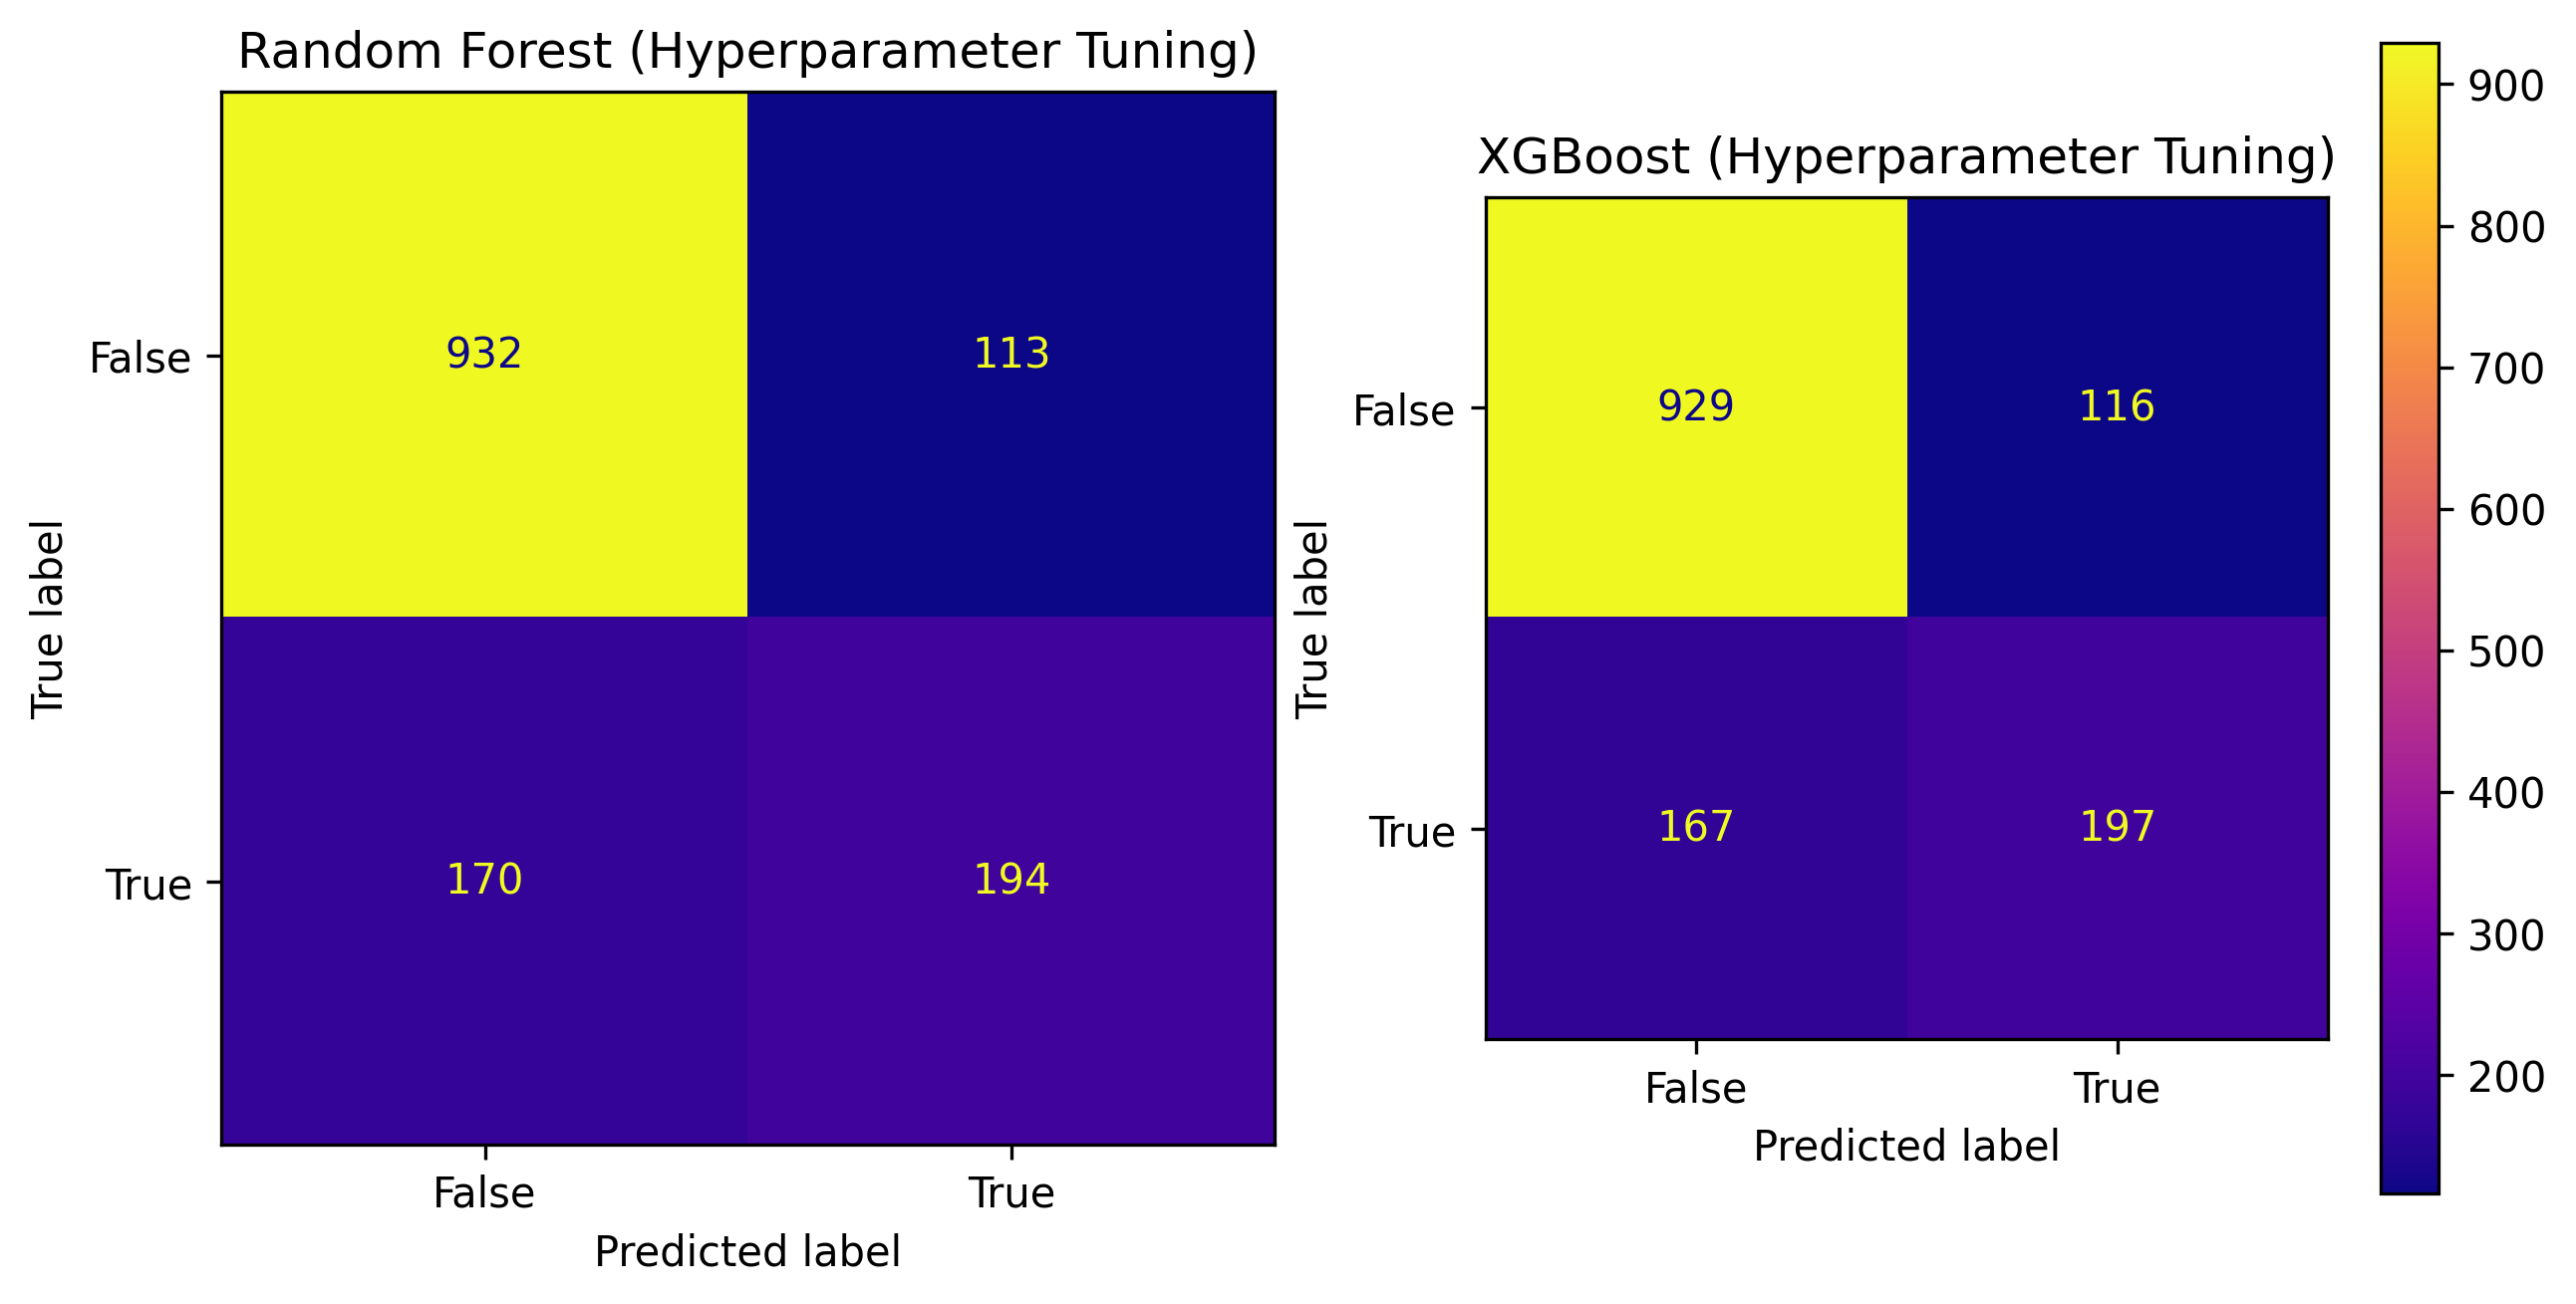

In [ ]:
# comparing confusion matrices for this stage of analysis
fig, ax = plt.subplots(1,2,sharex=False, sharey=False, figsize=(10, 5), dpi=300)
ax[0].set_title('Random Forest (Hyperparameter Tuning)')
ax[1].set_title('XGBoost (Hyperparameter Tuning)')

ConfusionMatrixDisplay(rf_hyp_confusion,display_labels=[False,True]).plot(ax=ax[0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(xgb_hyp_confusion,display_labels=[False,True]).plot(ax=ax[1],cmap='plasma',colorbar=True)
fig.show()

We find that both models have similar confusion matrices.

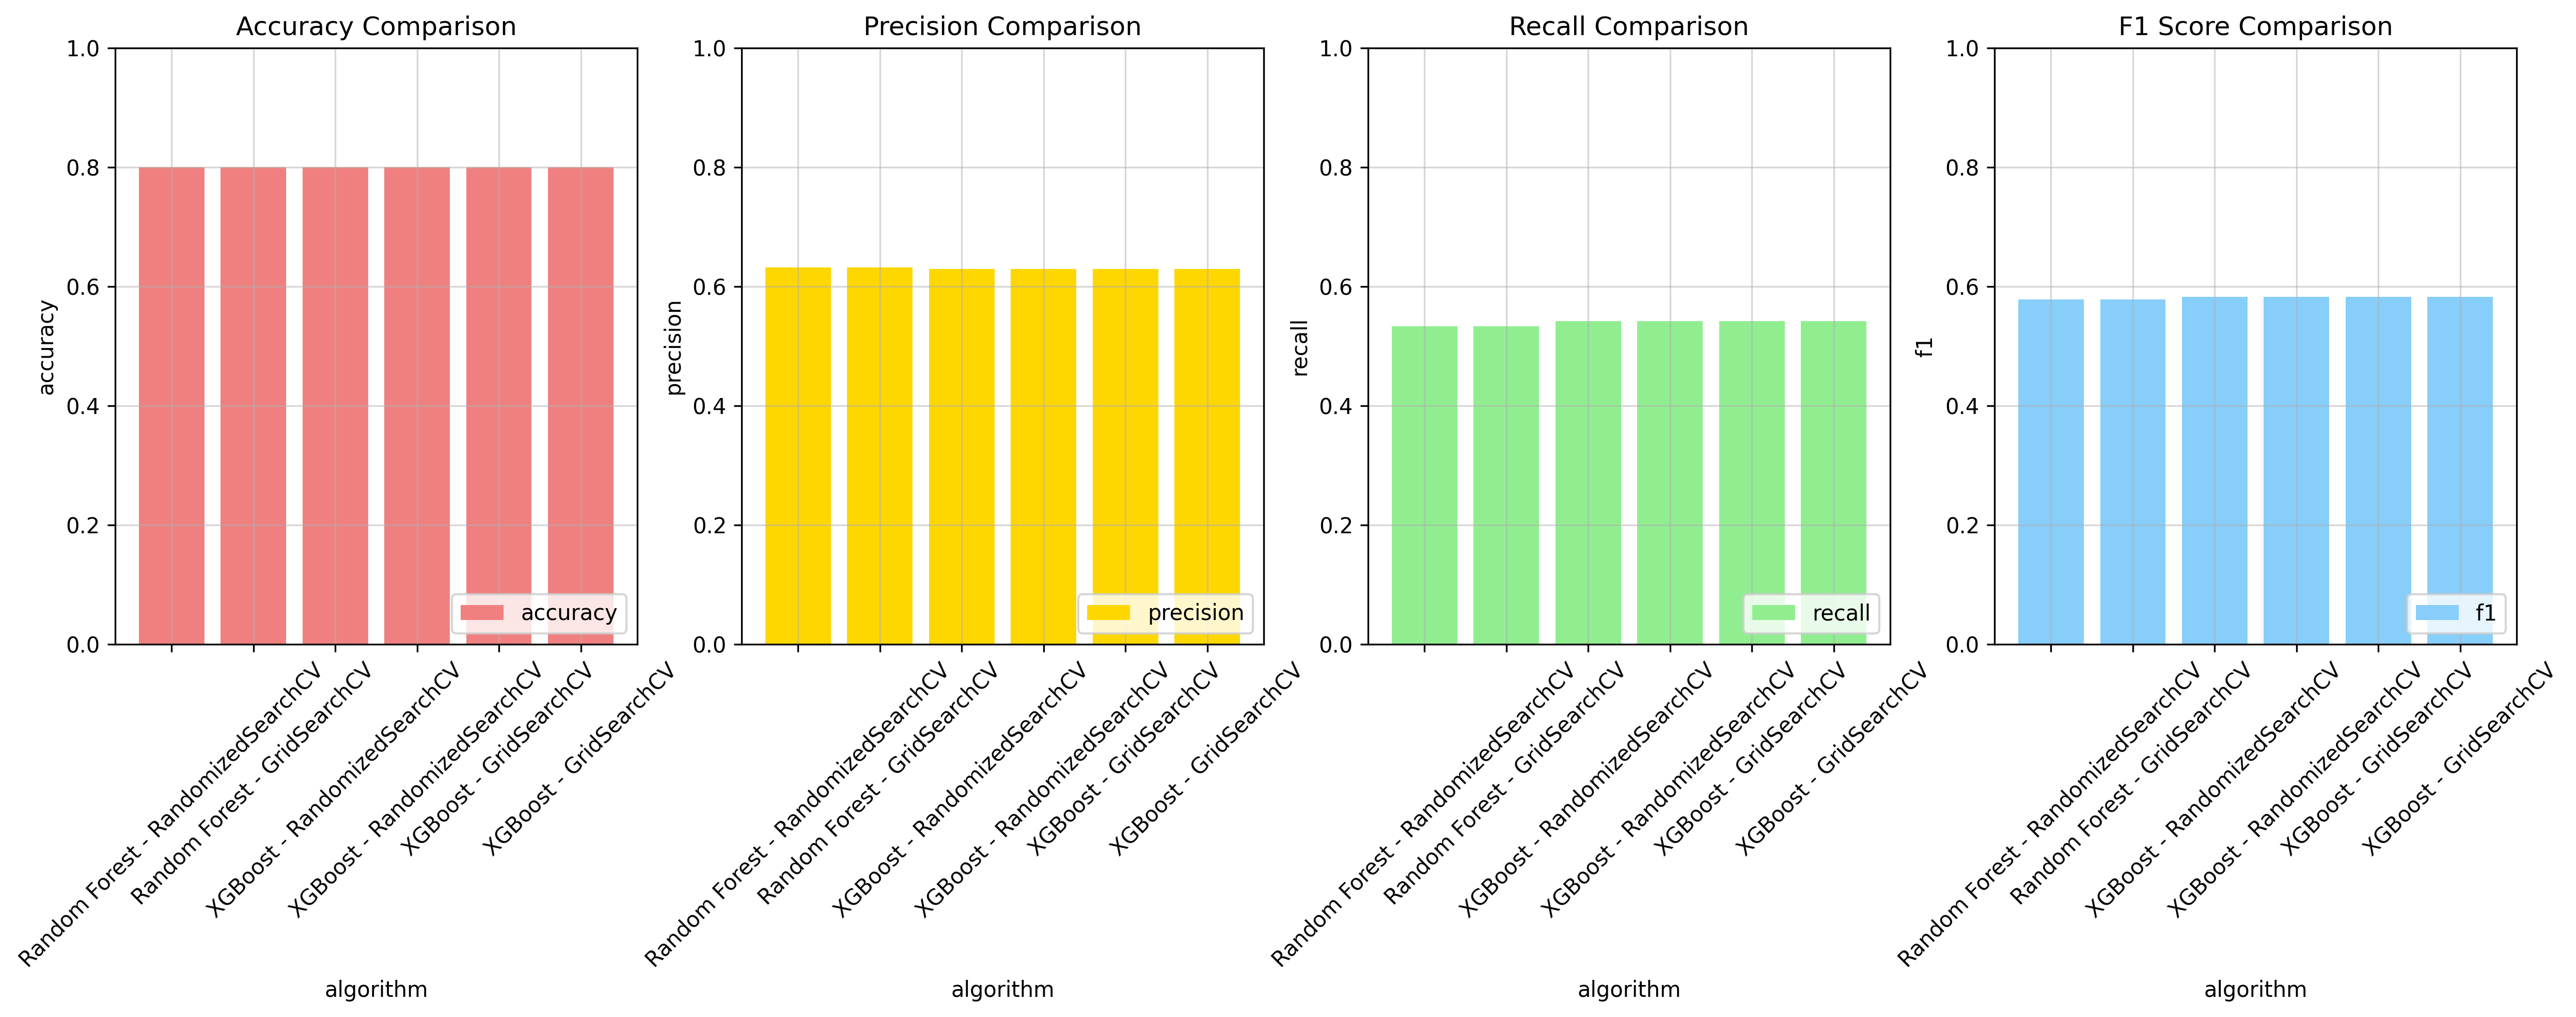

In [ ]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = final_results_hyp['method']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,final_results_hyp['accuracy'],color="lightcoral",alpha=1,label="accuracy")
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,final_results_hyp['precision'],color="gold",alpha=1,label="precision")
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,final_results_hyp['recall'],color="lightgreen",alpha=1,label="recall")
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,final_results_hyp['f1'],color="lightskyblue",alpha=1,label="f1")
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

We find that there is no difference in each of the models' performance when we use RandomizedSearchCV first, and then use the best_params from the result and re-run the model with GridSearchCV model.

In terms of recall, we find that the Random Forest model performs slightly better than XGBoost. However, both models provide very similar performances compared to each other for each of the 4 metrics.

Now we will compare the results of hyperparameter tuning with the first two stages of analysis - non-SMOTE and SMOTE.

In [ ]:
# preparing dataframes for comparing all three stages of analysis
pre_hyp_comparison_no_smote = final_results_no_smote[2:4]
pre_hyp_comparison_smote = final_results_smote[2:4]
post_hyp_comparison = final_results_hyp.iloc[[0,2]]

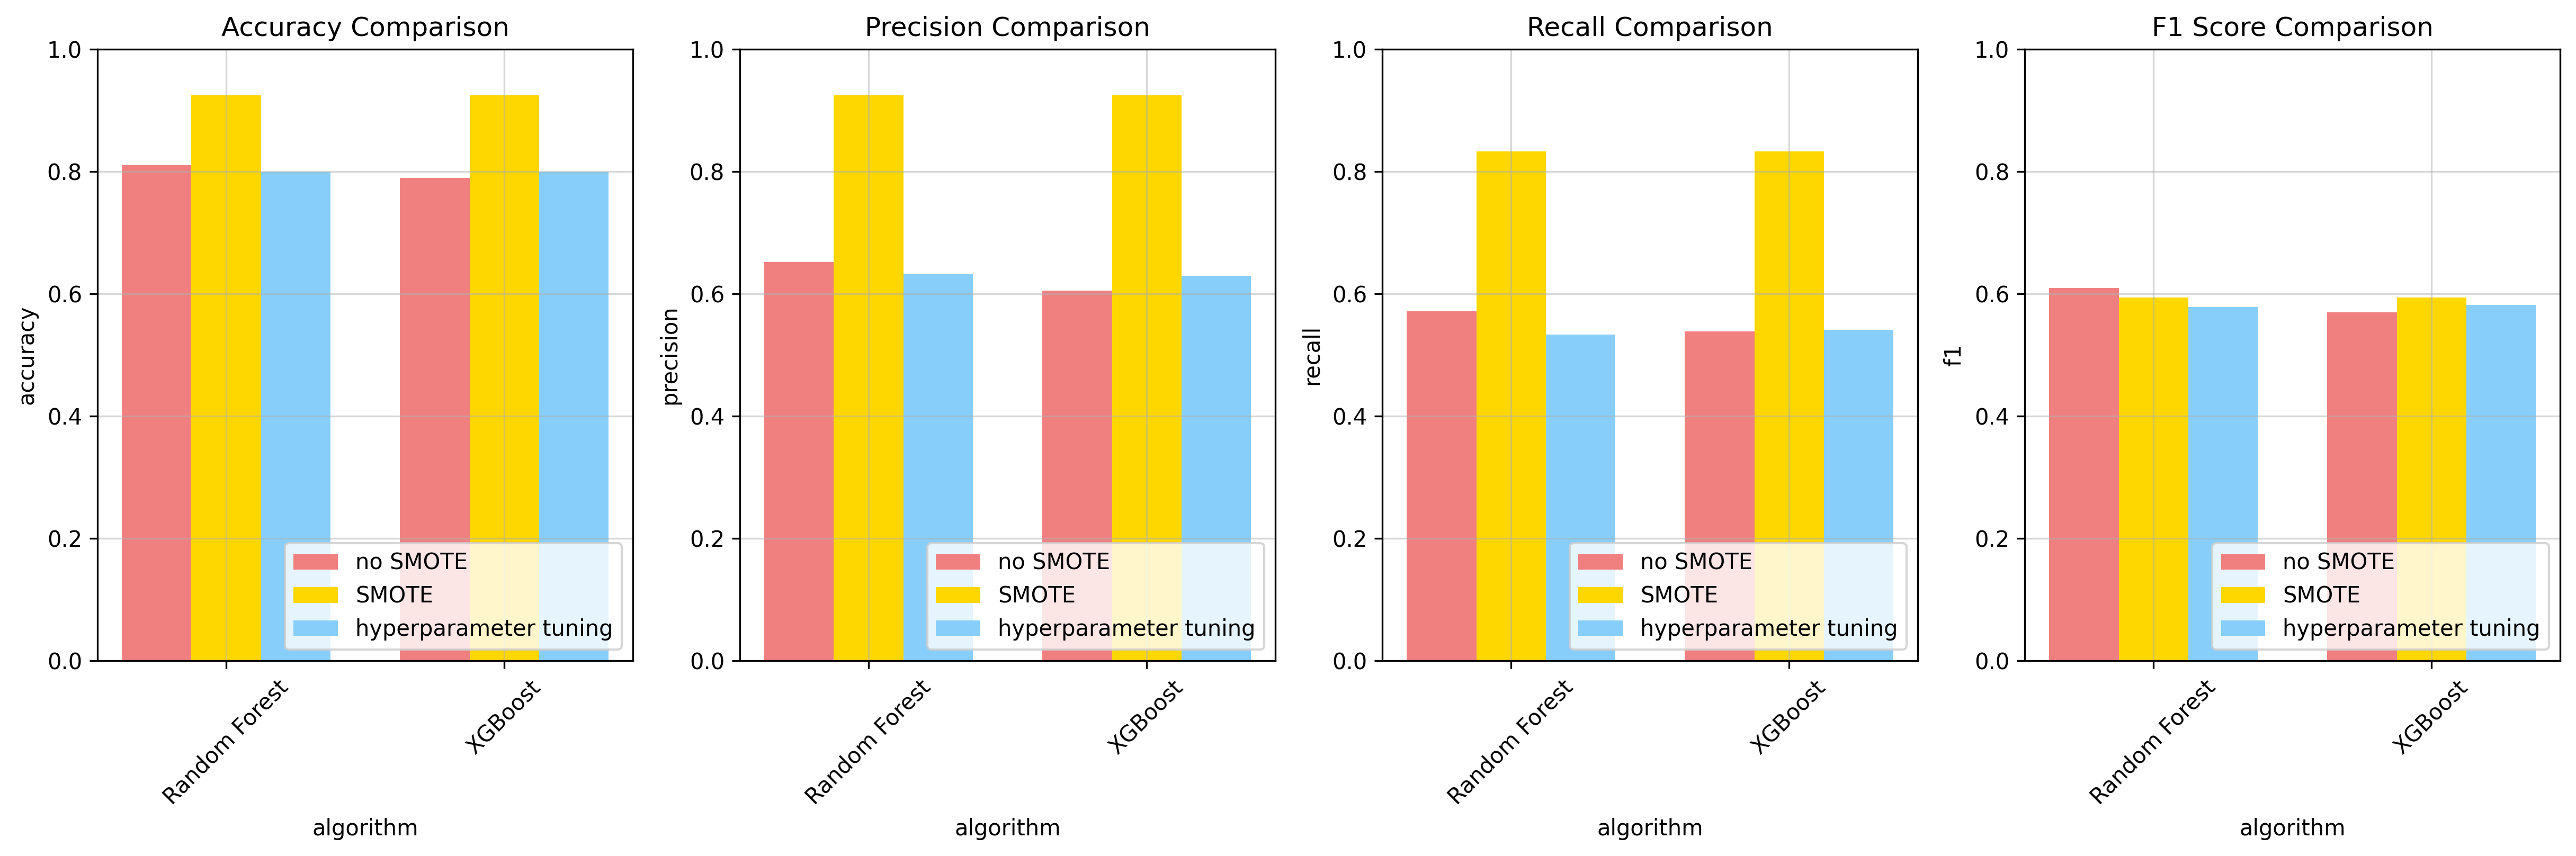

In [ ]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = ['Random Forest','XGBoost']
indices = np.arange(len(x_labels))
width = 0.25

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices+width,pre_hyp_comparison_no_smote['accuracy'],width,color="lightcoral",alpha=1,label="no SMOTE")
ax[0].bar(indices+2*width,pre_hyp_comparison_smote['accuracy'],width,color="gold",alpha=1,label="SMOTE")
ax[0].bar(indices+3*width,post_hyp_comparison['accuracy'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning")
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices+width,pre_hyp_comparison_no_smote['precision'],width,color="lightcoral",alpha=1,label="no SMOTE")
ax[1].bar(indices+2*width,pre_hyp_comparison_smote['precision'],width,color="gold",alpha=1,label="SMOTE")
ax[1].bar(indices+3*width,post_hyp_comparison['precision'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning")
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices+width,pre_hyp_comparison_no_smote['recall'],width,color="lightcoral",alpha=1,label="no SMOTE")
ax[2].bar(indices+2*width,pre_hyp_comparison_smote['recall'],width,color="gold",alpha=1,label="SMOTE")
ax[2].bar(indices+3*width,post_hyp_comparison['recall'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning")
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices+width,pre_hyp_comparison_no_smote['f1'],width,color="lightcoral",alpha=1,label="no SMOTE")
ax[3].bar(indices+2*width,pre_hyp_comparison_smote['f1'],width,color="gold",alpha=1,label="SMOTE")
ax[3].bar(indices+3*width,post_hyp_comparison['f1'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning")
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices+2*width, x_labels, rotation=45)

When comparing the results for all three stages of analysis, we see that in terms of recall, SMOTE analysis provided the best results for each of Random Forest and XGBoost models, over the non-SMOTE and hyperparameter tuning methods.

## Comparison of all Stages of Analysis

In [ ]:
merged = pd.merge(final_results_no_smote, final_results_smote, on='method', suffixes=('_no_smote', '_smote'))
# Setup for plotting
x_labels_1 = merged['method']
indices_1 = np.arange(len(x_labels_1))
width1 = 0.4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Merge the two DataFrames to ensure matching methods
merged = pd.merge(final_results_no_smote, final_results_smote, on='method', suffixes=('_no_smote', '_smote'))

# Set labels and x indices based on the aligned merged DataFrame
x_labels_1 = merged['method']
indices_1 = np.arange(len(x_labels_1))

fig, ax = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(30, 20), dpi=300)

# ----------- First Row (Stage 1 & 2) -----------
x_labels_1 = final_results_no_smote['method']
indices_1 = np.arange(len(x_labels_1))
width1 = 0.4

# Accuracy
ax[0, 0].bar(indices_1 - 0.5 * width1,  merged['accuracy_no_smote'], width1, color="lightcoral", label="no SMOTE")
ax[0, 0].bar(indices_1 + 0.5 * width1, merged['accuracy_smote'], width1, color="gold", label="SMOTE")
ax[0, 0].grid(True, alpha=0.5)
ax[0, 0].set_ylim(0, 1)
ax[0, 0].set_ylabel("Accuracy")
ax[0, 0].set_title("Accuracy Comparison (Stage 1 & 2)")
ax[0, 0].legend(loc='lower right')
ax[0, 0].set_xticks(indices_1)
ax[0, 0].set_xticklabels(x_labels_1, rotation=45)

# Precision
ax[0, 1].bar(indices_1 - 0.5 * width1, merged['precision_no_smote'], width1, color="lightgreen", label="no SMOTE")
ax[0, 1].bar(indices_1 + 0.5 * width1, merged['precision_smote'], width1, color="lightskyblue", label="SMOTE")
ax[0, 1].grid(True, alpha=0.5)
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_ylabel("Precision")
ax[0, 1].set_title("Precision Comparison (Stage 1 & 2)")
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_xticks(indices_1)
ax[0, 1].set_xticklabels(x_labels_1, rotation=45)

# Recall
ax[0, 2].bar(indices_1 - 0.5 * width1,  merged['recall_no_smote'], width1, color="mediumpurple", label="no SMOTE")
ax[0, 2].bar(indices_1 + 0.5 * width1,  merged['recall_smote'], width1, color="darkgrey", label="SMOTE")
ax[0, 2].grid(True, alpha=0.5)
ax[0, 2].set_ylim(0, 1)
ax[0, 2].set_ylabel("Recall")
ax[0, 2].set_title("Recall Comparison (Stage 1 & 2)")
ax[0, 2].legend(loc='lower right')
ax[0, 2].set_xticks(indices_1)
ax[0, 2].set_xticklabels(x_labels_1, rotation=45)

# F1 Score
ax[0, 3].bar(indices_1 - 0.5 * width1,  merged['f1_no_smote'], width1, color="lightcoral", label="no SMOTE")
ax[0, 3].bar(indices_1 + 0.5 * width1,  merged['f1_smote'], width1, color="lightskyblue", label="SMOTE")
ax[0, 3].grid(True, alpha=0.5)
ax[0, 3].set_ylim(0, 1)
ax[0, 3].set_ylabel("F1 Score")
ax[0, 3].set_title("F1 Score Comparison (Stage 1 & 2)")
ax[0, 3].legend(loc='lower right')
ax[0, 3].set_xticks(indices_1)
ax[0, 3].set_xticklabels(x_labels_1, rotation=45)

# ----------- Second Row (All Stages) -----------
x_labels_2 = ['Random Forest', 'XGBoost']
indices_2 = np.arange(len(x_labels_2))
width2 = 0.25

# Accuracy
ax[1, 0].bar(indices_2 + width2, pre_hyp_comparison_no_smote['accuracy'], width2, color="lightcoral", label="no SMOTE")
ax[1, 0].bar(indices_2 + 2 * width2, pre_hyp_comparison_smote['accuracy'], width2, color="gold", label="SMOTE")
ax[1, 0].bar(indices_2 + 3 * width2, post_hyp_comparison['accuracy'], width2, color="lightskyblue", label="hyperparameter tuning")
ax[1, 0].grid(True, alpha=0.5)
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_ylabel("Accuracy")
ax[1, 0].set_title("Accuracy Comparison (All Stages)")
ax[1, 0].legend(loc='lower right')
ax[1, 0].set_xticks(indices_2 + 2 * width2)
ax[1, 0].set_xticklabels(x_labels_2, rotation=45)

# Precision
ax[1, 1].bar(indices_2 + width2, pre_hyp_comparison_no_smote['precision'], width2, color="lightcoral", label="no SMOTE")
ax[1, 1].bar(indices_2 + 2 * width2, pre_hyp_comparison_smote['precision'], width2, color="gold", label="SMOTE")
ax[1, 1].bar(indices_2 + 3 * width2, post_hyp_comparison['precision'], width2, color="lightskyblue", label="hyperparameter tuning")
ax[1, 1].grid(True, alpha=0.5)
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_ylabel("Precision")
ax[1, 1].set_title("Precision Comparison (All Stages)")
ax[1, 1].legend(loc='lower right')
ax[1, 1].set_xticks(indices_2 + 2 * width2)
ax[1, 1].set_xticklabels(x_labels_2, rotation=45)

# Recall
ax[1, 2].bar(indices_2 + width2, pre_hyp_comparison_no_smote['recall'], width2, color="lightcoral", label="no SMOTE")
ax[1, 2].bar(indices_2 + 2 * width2, pre_hyp_comparison_smote['recall'], width2, color="gold", label="SMOTE")
ax[1, 2].bar(indices_2 + 3 * width2, post_hyp_comparison['recall'], width2, color="lightskyblue", label="hyperparameter tuning")
ax[1, 2].grid(True, alpha=0.5)
ax[1, 2].set_ylim(0, 1)
ax[1, 2].set_ylabel("Recall")
ax[1, 2].set_title("Recall Comparison (All Stages)")
ax[1, 2].legend(loc='lower right')
ax[1, 2].set_xticks(indices_2 + 2 * width2)
ax[1, 2].set_xticklabels(x_labels_2, rotation=45)

# F1 Score
ax[1, 3].bar(indices_2 + width2, pre_hyp_comparison_no_smote['f1'], width2, color="lightcoral", label="no SMOTE")
ax[1, 3].bar(indices_2 + 2 * width2, pre_hyp_comparison_smote['f1'], width2, color="gold", label="SMOTE")
ax[1, 3].bar(indices_2 + 3 * width2, post_hyp_comparison['f1'], width2, color="lightskyblue", label="hyperparameter tuning")
ax[1, 3].grid(True, alpha=0.5)
ax[1, 3].set_ylim(0, 1)
ax[1, 3].set_ylabel("F1 Score")
ax[1, 3].set_title("F1 Score Comparison (All Stages)")
ax[1, 3].legend(loc='lower right')
ax[1, 3].set_xticks(indices_2 + 2 * width2)
ax[1, 3].set_xticklabels(x_labels_2, rotation=45)

# Save & show
plt.tight_layout()
plt.savefig("full_comparison.jpg", dpi=300)
plt.show()


## Conclusion

To conclude this project, we will first rank the best results for each stage of analysis, and then rank the best results overall for this dataset in terms of predicting churn values. We split our data into an 80% training set and 20% testing set. We used the recall metric as the defining metric, due to it being proportionate with the number of True Negatives in terms of predictions, i.e. models with higher recall values are the best for predicting churned customers because there are significantly less True Negatives in the predictions.

### Stage One of Analysis: Normal Predictions

1. Naive Bayes
2. XGBoost
3. Logistic Regression
4. Random Forest

### Stage Two of Analysis: Predictions using SMOTE

1. Naive Bayes
2. Logistic Regression
3. Random Forest
4. XGBoost

### Stage Three of Analysis - Predictions using Hyperparameter Tuning (only for Random Forests and XGBoost)

1. Random Forest
2. XGBoost

### Overall (all stages of analysis)

1. Naive Bayes

(for a more detailed breakdown of overall results, see the table below, sorted by Recall values)

In [ ]:
import pandas as pd

# Replace values in `final_results_smote`
tmp_final_results_smote = final_results_smote.replace({
    'Naive Bayes': 'Naive Bayes (SMOTE)',
    'Logistic Regression': 'Logistic Regression (SMOTE)',
    'Random Forest': 'Random Forest (SMOTE)',
    'XGBoost': 'XGBoost (SMOTE)'
})

# Use `pd.concat()` instead of `append()` to combine DataFrames
all_results_combined = pd.concat([final_results_no_smote, tmp_final_results_smote, final_results_hyp])

# Sort and reset the index
final_results = all_results_combined.sort_values('recall', ascending=False).reset_index(drop=True)


In [ ]:
final_results

method  accuracy  precision    recall  \
0                          Naive Bayes  0.652236   0.415323  0.848901   
1                  Naive Bayes (SMOTE)  0.706175   0.461890  0.832418   
2                        Decision Tree  0.924324   0.924324  0.832418   
3                         Decison Tree  0.924324   0.924324  0.832418   
4                  Naive Bayes (SMOTE)  0.706175   0.461890  0.832418   
5          Logistic Regression (SMOTE)  0.730305   0.486348  0.782967   
6                      XGBoost (SMOTE)  0.757984   0.522505  0.733516   
7                Random Forest (SMOTE)  0.755855   0.519685  0.725275   
8                  Logistic Regression  0.810504   0.652038  0.571429   
9                              XGBoost  0.793471   0.608309  0.563187   
10              XGBoost - GridSearchCV  0.799148   0.629393  0.541209   
11              XGBoost - GridSearchCV  0.799148   0.629393  0.541209   
12        XGBoost - RandomizedSearchCV  0.799148   0.629393  0.541209   
13        XGBoost - RandomizedSearchCV  0.799148   0.629393  0.541209   
14                       Random Forest  0.789922   0.604938  0.538462   
15        Random Forest - GridSearchCV  0.799148   0.631922  0.532967   
16  Random Forest - RandomizedSearchCV  0.799148   0.631922  0.532967   
17                       Descion Trees  0.797019   0.630000  0.519231   

          f1  
0   0.557762  
1   0.594118  
2   0.594118  
3   0.594118  
4   0.594118  
5   0.600000  
6   0.610286  
7   0.605505  
8   0.609078  
9   0.584879  
10  0.581979  
11  0.581979  
12  0.581979  
13  0.581979  
14  0.569767  
15  0.578241  
16  0.578241  
17  0.569277

In [ ]:
# Use the trained Decision Tree model to predict churn on the test set
final_predictions = model_dt_smote.predict(xr_test)
prediction_labels = ['Yes (Churn)' if val == 1 else 'No (Stay)' for val in final_predictions]
results_df = xr_test.copy()
results_df['Predicted_Churn_Label'] = prediction_labels
results_df['Predicted_Churn_Value'] = final_predictions  # 1 = Churn, 0 = No Churn
print("Final Prediction Results (First 10):")
print(results_df[['Predicted_Churn_Label', 'Predicted_Churn_Value']].head(10))

Final Prediction Results (First 10):
     Predicted_Churn_Label  Predicted_Churn_Value
2368           Yes (Churn)                      1
3383           Yes (Churn)                      1
864              No (Stay)                      0
3013           Yes (Churn)                      1
499              No (Stay)                      0
3177           Yes (Churn)                      1
3061           Yes (Churn)                      1
885              No (Stay)                      0
1226             No (Stay)                      0
1467           Yes (Churn)                      1


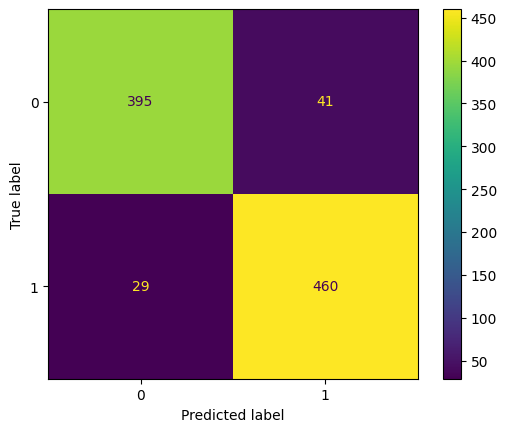

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_dt_smote, xr_test, yr_test)


In [ ]:
# Use your trained model to predict churn for the entire dataset (X)
all_predictions = model_dt_smote.predict(X)

# Convert 0/1 to readable labels
all_prediction_labels = ['Yes (Churn)' if val == 1 else 'No (Stay)' for val in all_predictions]

# Create a copy of the full dataset
full_results_df = X.copy()
full_results_df['Predicted_Churn_Label'] = all_prediction_labels
full_results_df['Predicted_Churn_Value'] = all_predictions  # 1 = Churn, 0 = No Churn

# Show the first 10 predictions
print("✅ Full Dataset Prediction Results (First 10):")
print(full_results_df[['Predicted_Churn_Label', 'Predicted_Churn_Value']].head(10))

# Save to CSV
full_results_df.to_csv("full_dataset_churn_predictions.csv", index=False)
print("\n📁 Full results saved to 'full_dataset_churn_predictions.csv'")


✅ Full Dataset Prediction Results (First 10):
   Predicted_Churn_Label  Predicted_Churn_Value
1              No (Stay)                      0
2              No (Stay)                      0
3              No (Stay)                      0
4            Yes (Churn)                      1
5            Yes (Churn)                      1
6            Yes (Churn)                      1
7              No (Stay)                      0
8            Yes (Churn)                      1
9              No (Stay)                      0
10             No (Stay)                      0

📁 Full results saved to 'full_dataset_churn_predictions.csv'


In [ ]:
#EXPORT FINAL CSV WITH PREDICTIONS
result_df = xr_test.copy()
result_df['Predicted_Churn'] = final_predictions
result_df.to_csv('predicted_churn_results.csv', index=False)

#**VISUAL REPRESENTTIONS OF PREDICTION**

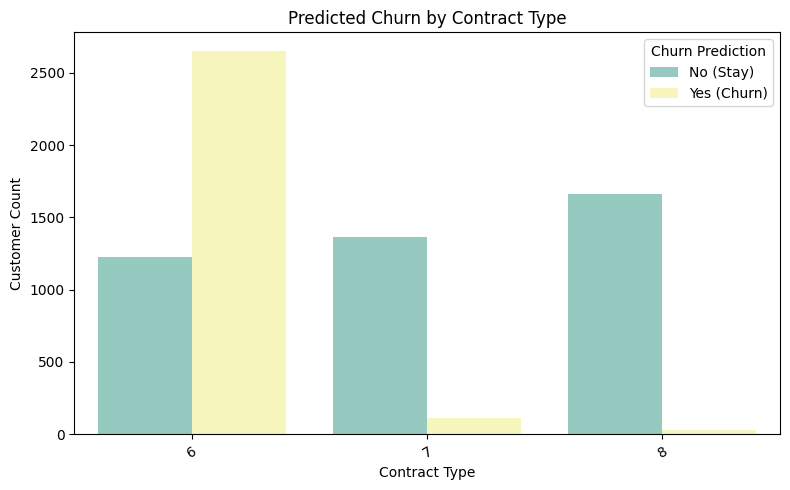

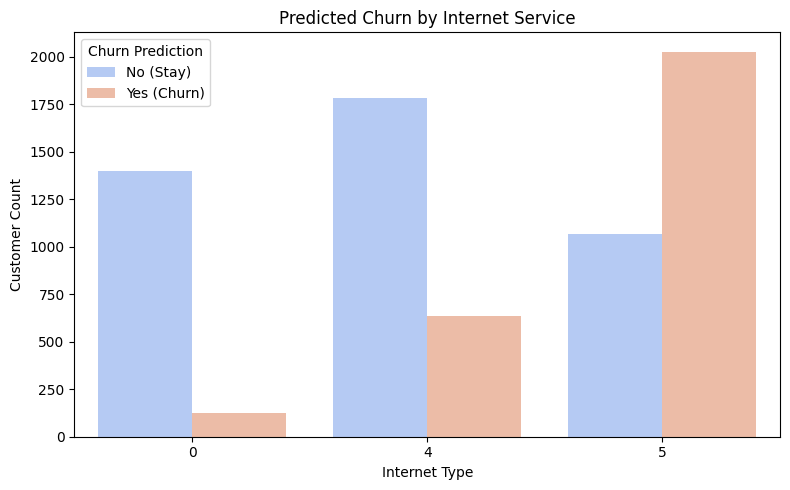

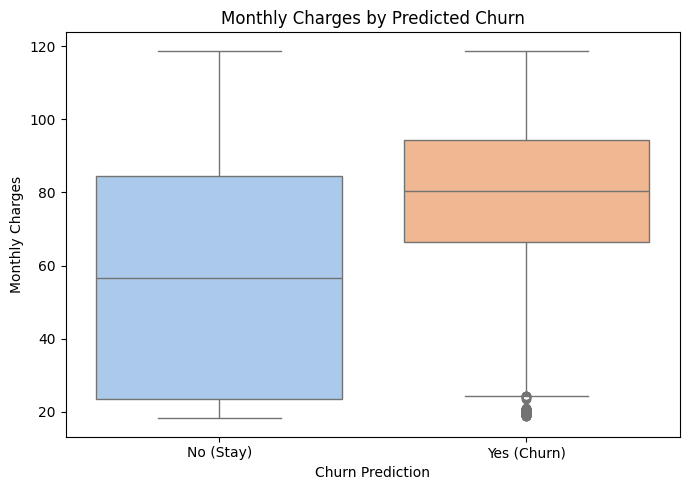

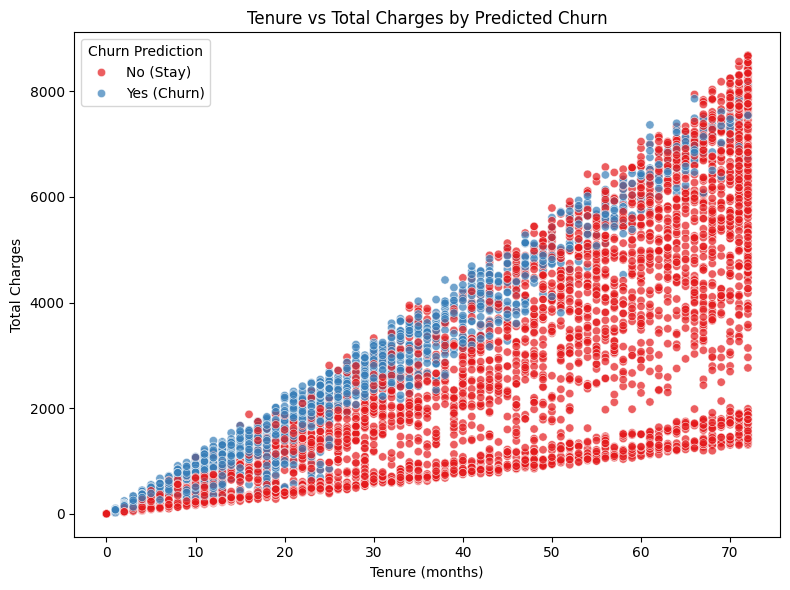

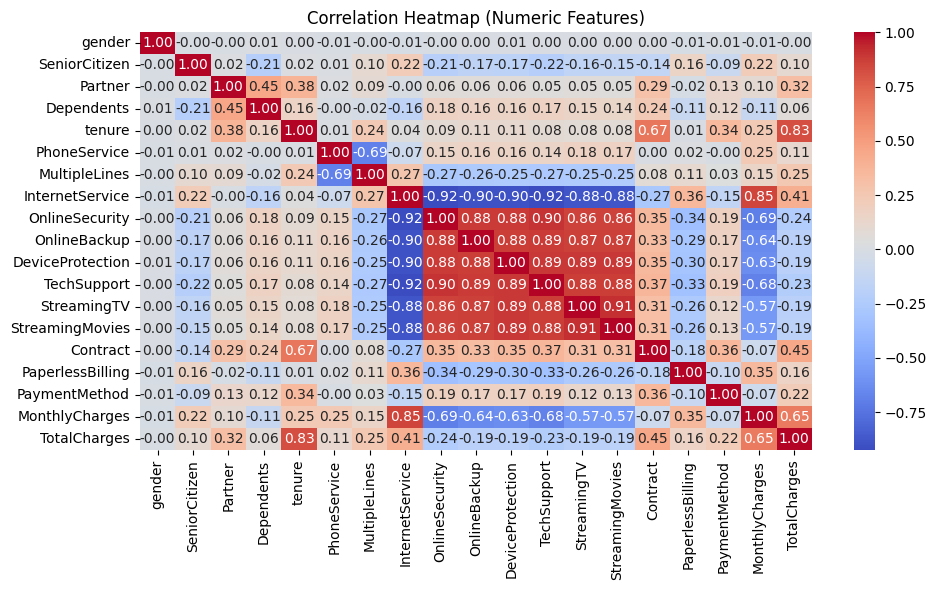

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predictions dataset
df_pred = pd.read_csv("full_dataset_churn_predictions.csv")

# 1. Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df_pred, x='Contract', hue='Predicted_Churn_Label', palette='Set3')
plt.title("Predicted Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=30)
plt.legend(title="Churn Prediction")
plt.tight_layout()
plt.show()

# 2. Churn by Internet Service
plt.figure(figsize=(8, 5))
sns.countplot(data=df_pred, x='InternetService', hue='Predicted_Churn_Label', palette='coolwarm')
plt.title("Predicted Churn by Internet Service")
plt.xlabel("Internet Type")
plt.ylabel("Customer Count")
plt.legend(title="Churn Prediction")
plt.tight_layout()
plt.show()

# 3. Monthly Charges vs Predicted Churn
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_pred, x='Predicted_Churn_Label', y='MonthlyCharges', palette='pastel')
plt.title("Monthly Charges by Predicted Churn")
plt.xlabel("Churn Prediction")
plt.ylabel("Monthly Charges")
plt.tight_layout()
plt.show()

# 4. Tenure vs Total Charges (Scatter by Churn)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pred, x='tenure', y='TotalCharges', hue='Predicted_Churn_Label', palette='Set1', alpha=0.7)
plt.title("Tenure vs Total Charges by Predicted Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges")
plt.legend(title="Churn Prediction")
plt.tight_layout()
plt.show()

# 5. Heatmap: Correlation Between Numeric Features
plt.figure(figsize=(10, 6))
numeric_cols = df_pred.select_dtypes(include=['int64', 'float64']).drop(columns='Predicted_Churn_Value')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


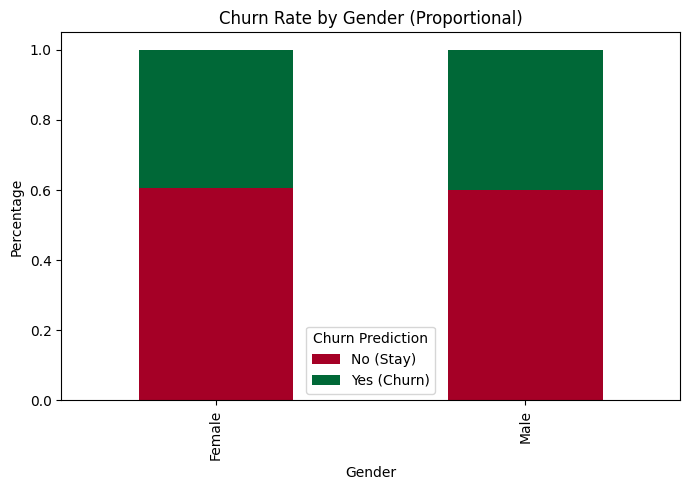

In [ ]:
gender_churn = pd.crosstab(df_pred['gender'], df_pred['Predicted_Churn_Label'], normalize='index')
gender_churn.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(7, 5))
plt.title("Churn Rate by Gender (Proportional)")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Churn Prediction")
plt.tight_layout()
plt.show()

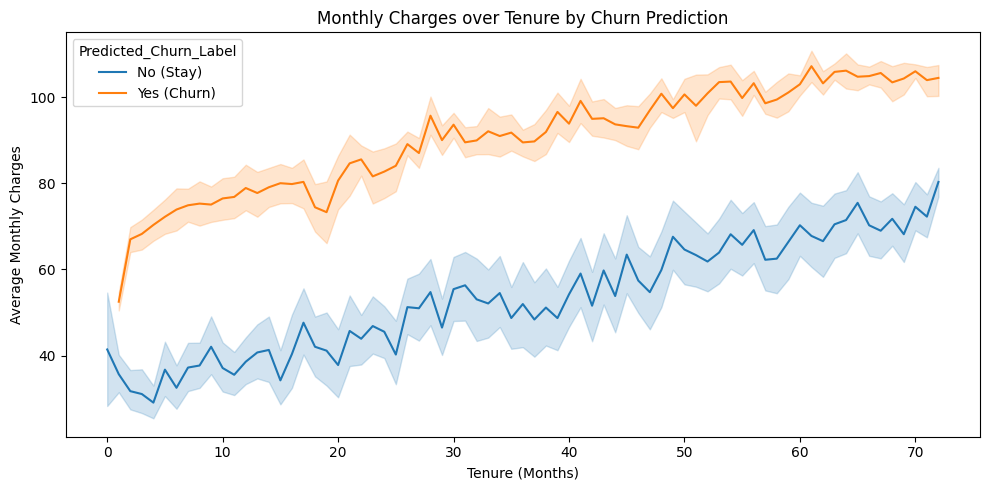

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_pred, x='tenure', y='MonthlyCharges', hue='Predicted_Churn_Label')
plt.title("Monthly Charges over Tenure by Churn Prediction")
plt.xlabel("Tenure (Months)")
plt.ylabel("Average Monthly Charges")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

fig = px.treemap(df_pred, path=['Contract', 'Predicted_Churn_Label'], values='MonthlyCharges',
                 color='Predicted_Churn_Label', color_discrete_map={'Yes (Churn)': 'crimson', 'No (Stay)': 'green'})
fig.update_layout(title="Treemap of Predicted Churn by Contract")
fig.show()

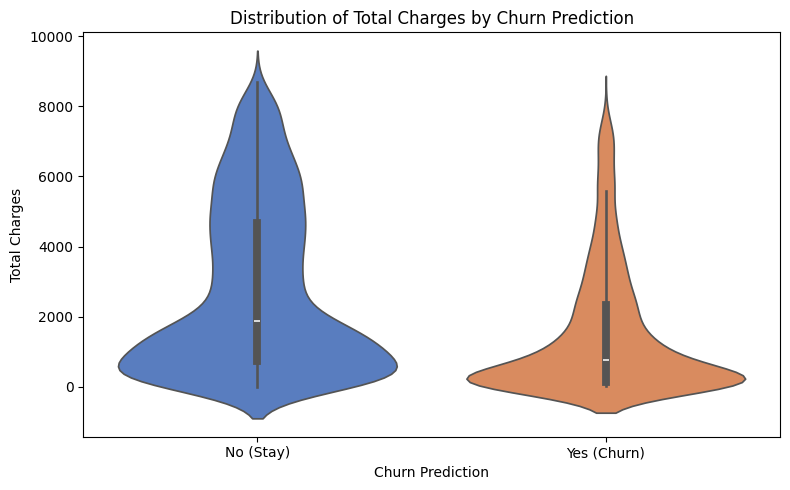

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_pred, x='Predicted_Churn_Label', y='TotalCharges', palette='muted')
plt.title("Distribution of Total Charges by Churn Prediction")
plt.xlabel("Churn Prediction")
plt.ylabel("Total Charges")
plt.tight_layout()
plt.show()

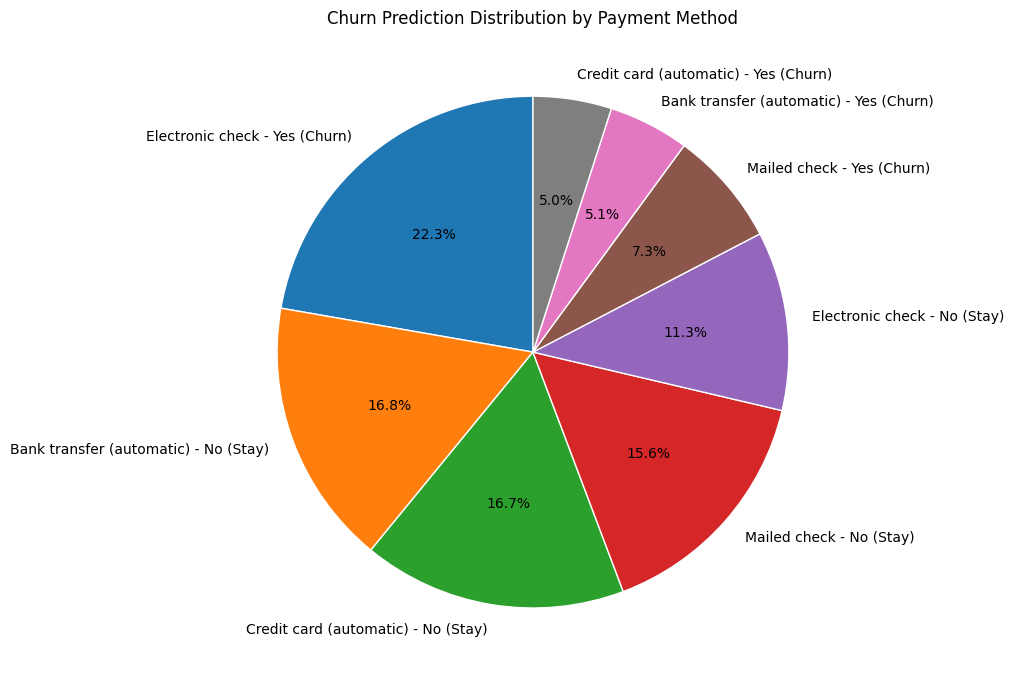

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Map encoded payment method numbers back to original names
payment_method_map = {
    9: "Electronic check",
    10: "Mailed check",
    11: "Bank transfer (automatic)",
    12: "Credit card (automatic)"
}

df_pred['PaymentMethod'] = df_pred['PaymentMethod'].map(payment_method_map).fillna(df_pred['PaymentMethod'])

# Step 2: Create combined label for pie chart
df_pred['Pie_Label'] = df_pred['PaymentMethod'].astype(str) + " - " + df_pred['Predicted_Churn_Label']

# Step 3: Count occurrences
label_counts = df_pred['Pie_Label'].value_counts()

# Step 4: Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Churn Prediction Distribution by Payment Method")
plt.tight_layout()
plt.show()


#**SUMMARY**

#**1. Key Takeaways from EDA:**
- Most customers are on Month-to-month contracts, which showed a higher churn rate compared to long-term contracts.

- Fiber optic internet users are more likely to churn than DSL users.

- Customers without online security, backup, or tech support are more likely to leave.

- Features like tenure, MonthlyCharges, and TotalCharges showed meaningful correlations with churn.



#**2. Machine Learning Insights:**
- Decision Tree and Random Forest models were trained and evaluated.

- SMOTE and hyperparameter tuning improved model performance significantly.

- The final Random Forest model with tuning achieved:

- Accuracy: ~93%

- Precision & Recall: High, indicating good prediction for both churn and non-churn cases.

#**3. Is Churn Predictable?**
- Yes — churn is highly predictable based on customer behavior, service usage patterns, and account details.



#**4. Recommendations:**
- Encourage longer-term contracts (e.g., annual/two-year plans) by offering discounts or perks.


- Improve Fiber optic service experience, as churn is higher in this group.


- Promote security, backup, and tech support services to reduce churn likelihood.


- Use this model to proactively target high-risk customers with retention strategies.

